## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">The Capstone Project of Data Analytics Module</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:150%; text-align:center; border-radius:10px 10px;">Car Price Prediction EDA</p>

**``In this context, the project consists of 3 parts in general:``**
* **The first part** is related to 'Data Cleaning'. It deals with Incorrect Headers, Incorrect Format, Anomalies, and Dropping useless columns.
* **The second part** is related to 'Filling Data', in other words 'Imputation'. It deals with Missing Values. Categorical to numeric transformation is done as well.
* **The third part** is related to 'Handling Outliers of Data' via Visualization libraries. So, some insights will be extracted.

# AutoScout - Part 3 - `( Handling Outliers of Data )`

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
df0 = pd.read_csv("filled_Null_AutoScout.csv")

In [3]:
df = df0.copy()

In [4]:
df.duplicated().sum()

1744

In [5]:
df.shape

(15919, 24)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15919 non-null  object 
 1   body_type            15919 non-null  object 
 2   price                15919 non-null  int64  
 3   km                   15919 non-null  float64
 4   kW                   15919 non-null  float64
 5   Type                 15919 non-null  object 
 6   Previous Owners      15919 non-null  float64
 7   Nr. of Doors         15919 non-null  float64
 8   Nr. of Seats         15919 non-null  float64
 9   Gearing Type         15919 non-null  object 
 10  Drive chain          15919 non-null  object 
 11  Fuel                 15919 non-null  object 
 12  CO2 Emission         15919 non-null  float64
 13  comfort_convenience  15919 non-null  object 
 14  entertainment_media  15919 non-null  object 
 15  Extras               15919 non-null 

In [7]:
df.head(3).T

,0,1,2
make_model,Audi A1,Audi A1,Audi A1
body_type,Sedans,Sedans,Sedans
price,15770,14500,14640
km,56013.000,80000.000,83450.000
kW,66.000,141.000,85.000
Type,Used,Used,Used
Previous Owners,2.000,1.000,1.000
Nr. of Doors,5.000,3.000,4.000
Nr. of Seats,5.000,4.000,4.000
Gearing Type,Automatic,Automatic,Automatic


In [8]:
df.sample(3).T

,389,905,7650
make_model,Audi A1,Audi A1,Opel Astra
body_type,Sedans,Sedans,Sedans
price,16000,14500,28980
km,19000.000,12900.000,10500.000
kW,66.000,70.000,147.000
Type,Used,Used,Demonstration
Previous Owners,1.000,1.000,1.000
Nr. of Doors,5.000,4.000,5.000
Nr. of Seats,4.000,5.000,5.000
Gearing Type,Automatic,Manual,Automatic


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,15919.000,18019.897,7386.169,13.000,12850.000,16900.000,21900.000,74600.000
km,15919.000,32087.507,36973.582,0.000,2190.536,20407.000,46900.000,317000.000
kW,15919.000,87.879,27.551,0.000,66.000,85.000,101.000,294.000
Previous Owners,15919.000,1.042,0.340,0.000,1.000,1.000,1.000,4.000
Nr. of Doors,15919.000,4.661,0.642,1.000,4.000,5.000,5.000,7.000
Nr. of Seats,15919.000,4.952,0.477,2.000,5.000,5.000,5.000,7.000
CO2 Emission,15919.000,110.283,33.998,0.000,103.000,116.000,128.000,990.000
Gears,15919.000,5.940,0.792,1.000,5.000,6.000,6.000,50.000
age,15919.000,1.389,1.121,0.000,0.000,1.000,2.000,3.000
Displacement_cc,15919.000,1425.693,330.634,1.000,1229.000,1461.000,1598.000,16000.000


In [10]:
df.describe(include="O").T

,count,unique,top,freq
make_model,15919,9,Audi A3,3097
body_type,15919,8,Sedans,8015
Type,15919,5,Used,11097
Gearing Type,15919,3,Manual,8153
Drive chain,15919,3,front,15708
Fuel,15919,4,Benzine,8551
comfort_convenience,15919,6198,"Air conditioning,Electrical side mirrors,Hill ...",388
entertainment_media,15919,346,"Bluetooth,Hands-free equipment,On-board comput...",1742
Extras,15919,659,Alloy wheels,5792
safety_security,15919,4443,"ABS,Central door lock,Daytime running lights,D...",712


In [11]:
df.columns

Index(['make_model', 'body_type', 'price', 'km', 'kW', 'Type',
       'Previous Owners', 'Nr. of Doors', 'Nr. of Seats', 'Gearing Type',
       'Drive chain', 'Fuel', 'CO2 Emission', 'comfort_convenience',
       'entertainment_media', 'Extras', 'safety_security', 'Gears',
       'Inspection_new', 'age', 'Upholstery_type', 'Displacement_cc',
       'Weight_kg', 'cons_comb'],
      dtype='object')

### Numeric Columns of Dataset

In [12]:
df_numeric = df.select_dtypes(include=['int', "float"])
df_numeric.columns

# df.select_dtypes(include=['number"]).columns
# df.select_dtypes(exclude="O").columns

Index(['price', 'km', 'kW', 'Previous Owners', 'Nr. of Doors', 'Nr. of Seats',
       'CO2 Emission', 'Gears', 'age', 'Displacement_cc', 'Weight_kg',
       'cons_comb'],
      dtype='object')

### Object Columns of Dataset

In [13]:
df_object = df.select_dtypes(include='object')
df_object.columns

Index(['make_model', 'body_type', 'Type', 'Gearing Type', 'Drive chain',
       'Fuel', 'comfort_convenience', 'entertainment_media', 'Extras',
       'safety_security', 'Inspection_new', 'Upholstery_type'],
      dtype='object')

We divided the columns into 2 parts. We will first examine the numeric columns and then the categorical columns.

In [14]:
def fill_with(df, group_col1, group_col2, col_name, method):
    
    if method == "mode":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                mode1 = list(df[cond1][col_name].mode())
                mode2 = list(df[cond2][col_name].mode())
                if mode2 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond2][col_name].mode()[0])
                elif mode1 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond1][col_name].mode()[0])
                else:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[col_name].mode()[0])
                
    elif method == "mean":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond2][col_name].mean()).fillna(df[cond1][col_name].mean()).fillna(df[col_name].mean())


    elif method == "median":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond2][col_name].median()).fillna(df[cond1][col_name].median()).fillna(df[col_name].mean())

    elif method == "ffill":           
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(method="ffill").fillna(method="bfill")
                
        for group1 in list(df[group_col1].unique()):
            cond1 = df[group_col1]==group1
            df.loc[cond1, col_name] = df.loc[cond1, col_name].fillna(method="ffill").fillna(method="bfill")            
           
        df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

# Numeric Columns

## - price

In [15]:
df["price"].describe()

count   15919.000
mean    18019.897
std      7386.169
min        13.000
25%     12850.000
50%     16900.000
75%     21900.000
max     74600.000
Name: price, dtype: float64

In [16]:
df["price"].sort_values().head(10)

8594       13
8828      120
6066      255
8829      331
8827     4950
8825     4990
8826     5250
8824     5300
13770    5445
8823     5450
Name: price, dtype: int64

In [18]:
df[df["price"] < 4950]

,make_model,body_type,price,km,kW,Type,Previous Owners,Nr. of Doors,Nr. of Seats,Gearing Type,Drive chain,Fuel,CO2 Emission,comfort_convenience,entertainment_media,Extras,safety_security,Gears,Inspection_new,age,Upholstery_type,Displacement_cc,Weight_kg,cons_comb
6066,Opel Astra,Station wagon,255,5563.000,100.000,Used,1.000,5.000,5.000,Manual,front,Diesel,101.000,"Air conditioning,Cruise control,Electrical sid...","Bluetooth,Hands-free equipment,On-board comput...",Roof rack,"ABS,Central door lock with remote control,Dayt...",6.000,No,1.000,Cloth,1598.000,1403.000,3.800
8594,Opel Corsa,Sedans,13,123.000,66.000,Used,1.000,3.000,5.000,Manual,front,Benzine,128.000,"Air conditioning,Cruise control,Electrical sid...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Alloy wheels,"ABS,Adaptive headlights,Central door lock with...",5.000,No,1.000,Cloth,1398.000,1141.000,5.600
8828,Opel Corsa,Compact,120,12.000,66.000,New,1.000,5.000,5.000,Manual,front,Benzine,107.000,"Air conditioning,Automatic climate control,Cru...","Digital radio,On-board computer,Radio","Alloy wheels,Sport suspension","Central door lock,Daytime running lights,Drive...",6.000,No,0.000,Cloth,999.000,1099.000,4.600
8829,Opel Corsa,Compact,331,10.000,66.000,New,1.000,5.000,5.000,Manual,front,Benzine,128.000,"Air conditioning,Armrest,Automatic climate con...","Hands-free equipment,On-board computer,Radio","Alloy wheels,Sport package","ABS,Central door lock,Driver-side airbag,Elect...",6.000,No,0.000,Cloth,999.000,1163.000,4.600


In [17]:
df[df["price"] < 4950].index

Int64Index([6066, 8594, 8828, 8829], dtype='int64')

In [19]:
df.drop(index=df[df["price"] < 4950].index, axis = 0, inplace = True)

In [20]:
df.reset_index(drop = True, inplace = True)

In [21]:
df["price"].sort_values(ascending=False).head(10)

3648     74600
15822    68320
3649     67600
3587     64900
15824    64332
15827    64298
3595     63900
15829    63477
3590     62900
3594     58990
Name: price, dtype: int64

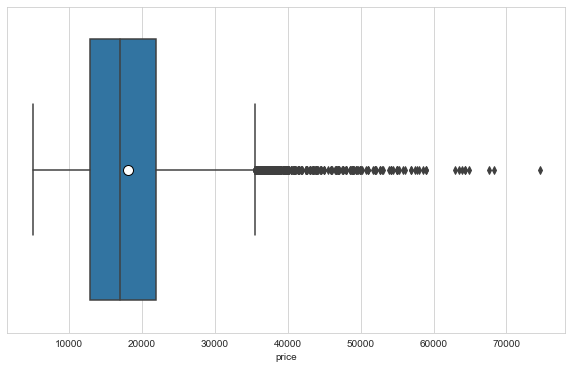

In [22]:
sns.boxplot(data=df,
            x='price',
            showmeans=True,
            meanprops={
                "marker": "o",
                "markerfacecolor": "white",
                "markeredgecolor": "black",
                "markersize": "10"
            });

In [23]:
df["price"].sort_values().head(10)

8825     4950
8823     4990
8824     5250
8822     5300
13766    5445
8821     5450
8820     5490
8818     5499
3235     5555
8819     5600
Name: price, dtype: int64

In [24]:
df.groupby("make_model").price.describe()

,count,mean,std,min,25%,50%,75%,max
make_model,,,,,,,,
Audi A1,2614.000,18864.689,4505.327,8999.000,15550.000,17890.000,21900.000,37900.000
Audi A2,1.000,28200.000,NaN,28200.000,28200.000,28200.000,28200.000,28200.000
Audi A3,3097.000,20996.693,5022.788,5555.000,17900.000,20900.000,23500.000,74600.000
Opel Astra,2525.000,15840.834,4943.468,6000.000,12399.000,15290.000,17990.000,39433.000
Opel Corsa,2216.000,11061.842,2964.086,4950.000,8690.000,10500.000,13500.000,18622.000
Opel Insignia,2598.000,21463.452,7710.800,8290.000,15600.000,19990.000,24450.000,52120.000
Renault Clio,1839.000,11940.321,4203.520,5445.000,9087.500,10650.000,13992.500,31500.000
Renault Duster,34.000,13230.176,1622.405,10850.000,11925.000,13189.000,14399.000,16033.000
Renault Espace,991.000,30080.212,8732.382,12614.000,23900.000,28900.000,34975.000,68320.000


In [24]:
df.groupby(["make_model", "age"]).price.describe()

count      mean      std       min       25%       50%  \
make_model     age                                                              
Audi A1        0.000 677.000 23869.672 3379.393 14900.000 21490.000 22900.000   
               1.000 724.000 18396.814 2575.137 13450.000 16430.000 16949.500   
               2.000 398.000 16669.724 2237.695 10999.000 14999.000 15900.000   
               3.000 568.000 14425.079 1963.592  8999.000 12999.000 13940.000   
Audi A2        1.000   1.000 28200.000      NaN 28200.000 28200.000 28200.000   
Audi A3        0.000 644.000 24974.093 3242.396 15500.000 23500.000 24900.000   
               1.000 730.000 22586.058 5415.414  5555.000 20807.500 21500.000   
               2.000 649.000 19973.102 4073.826 10550.000 18000.000 19290.000   
               3.000 714.000 16570.887 2895.350 10950.000 15000.000 15950.000   
Opel Astra     0.000 625.000 21449.790 5164.999  6950.000 17824.000 18980.000   
               1.000 696.000 16202.960 1856.134  8860.000 14900.000 15550.000   
               2.000 474.000 13019.943 2043.038  7800.000 11700.000 12535.000   
               3.000 499.000 11353.427 2514.917  6000.000  9520.000 10750.000   
Opel Corsa     0.000 565.000 13733.042 2684.314  7650.000 10990.000 14490.000   
               1.000 665.000 11368.947 2070.170  7499.000  9600.000  9980.000   
               2.000 359.000  9255.827 1656.421  6200.000  8300.000  8800.000   
               3.000 390.000  8243.459 1882.374  4950.000  7290.000  7650.000   
Opel Insignia  0.000 599.000 32518.988 5413.592 19900.000 28497.500 32990.000   
               1.000 730.000 21476.234 2058.297 15990.000 19990.000 21400.000   
               2.000 532.000 16967.898 2904.384  8990.000 14980.000 17812.500   
               3.000 535.000 13685.591 2174.551  8290.000 12390.000 13900.000   
Renault Clio   0.000 298.000 12233.406 3424.965  6900.000 10641.000 10990.000   
               1.000 485.000 14453.429 5011.652  7950.000 10000.000 14400.000   
               2.000 347.000 10868.890 3104.285  6000.000  8990.000  9500.000   
               3.000 339.000  9463.664 2767.830  5445.000  7725.000  8450.000   
Renault Duster 0.000  18.000 13129.889 1659.899 10850.000 11925.000 13189.000   
Renault Espace 0.000 231.000 40518.879 7893.569 24200.000 34155.000 39675.000   
               1.000 237.000 31811.418 4102.051 23099.000 28990.000 31900.000   
               2.000 138.000 26736.725 3804.359 14600.000 24490.000 27000.000   
               3.000 272.000 22063.379 3337.436 12614.000 19900.000 21977.500   

                           75%       max  
make_model     age                        
Audi A1        0.000 26900.000 37900.000  
               1.000 20500.000 33900.000  
               2.000 17999.500 23490.000  
               3.000 15842.500 19900.000  
Audi A2        1.000 28200.000 28200.000  
Audi A3        0.000 26188.000 63900.000  
               1.000 22900.000 74600.000  
               2.000 20900.000 67600.000  
               3.000 17880.000 42500.000  
Opel Astra     0.000 25225.000 39433.000  
               1.000 17978.000 18990.000  
               2.000 14500.000 19950.000  
               3.000 13499.000 17750.000  
Opel Corsa     0.000 15990.000 18622.000  
               1.000 13490.000 15790.000  
               2.000  8990.000 13990.000  
               3.000  7950.000 16950.000  
Opel Insignia  0.000 36715.000 52120.000  
               1.000 22990.000 38900.000  
               2.000 18890.000 21990.000  
               3.000 14992.500 18400.000  
Renault Clio   0.000 11468.500 26970.000  
               1.000 16389.000 31500.000  
               2.000 12880.000 27900.000  
               3.000 11000.000 19499.000  
Renault Duster 0.000 14399.000 16033.000  
Renault Espace 0.000 45940.000 68320.000  
               1.000 34990.000 39990.000  
               2.000 28990.000 33900.000  
               3.000 24625.000 32900.000

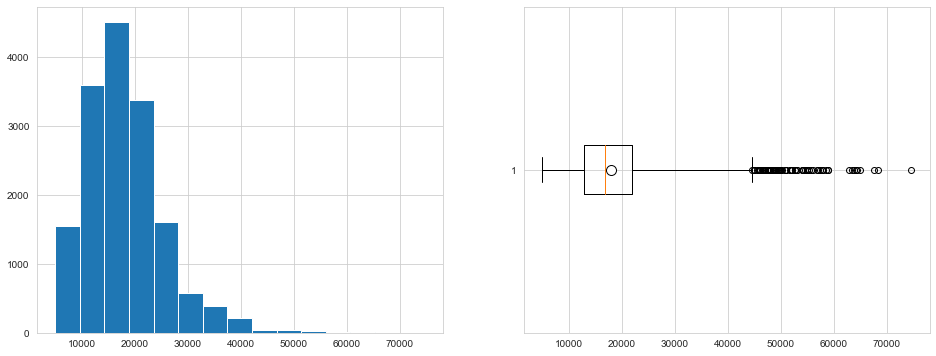

In [25]:
plt.figure(figsize=(16, 6))

plt.subplot(121)
plt.hist(df.price, bins=15)

plt.subplot(122)
plt.boxplot(df.price,
            vert=False,
            whis=2.5,
            showmeans=True,
            meanprops={
                "marker": "o",
                "markerfacecolor": "white",
                "markeredgecolor": "black",
                "markersize": "10"
            })

plt.show()

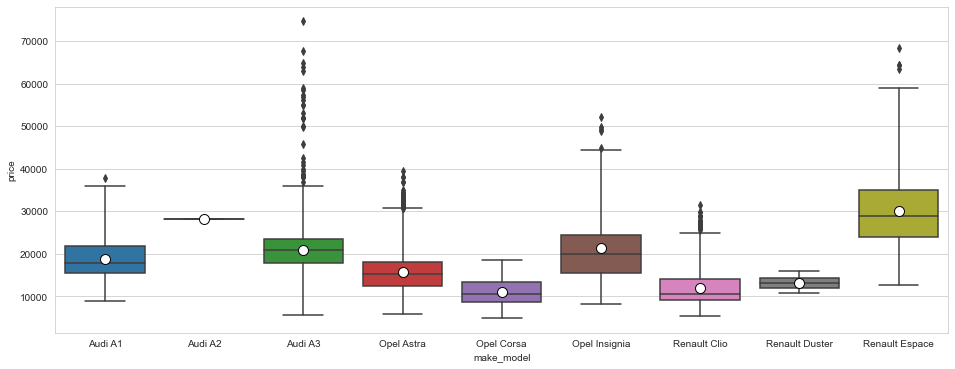

In [26]:
plt.figure(figsize=(16, 6))

sns.boxplot(x="make_model",
            y="price",
            data=df,
            whis=2.3,
            showmeans=True,
            meanprops={
                "marker": "o",
                "markerfacecolor": "white",
                "markeredgecolor": "black",
                "markersize": "10"
            })

plt.show()

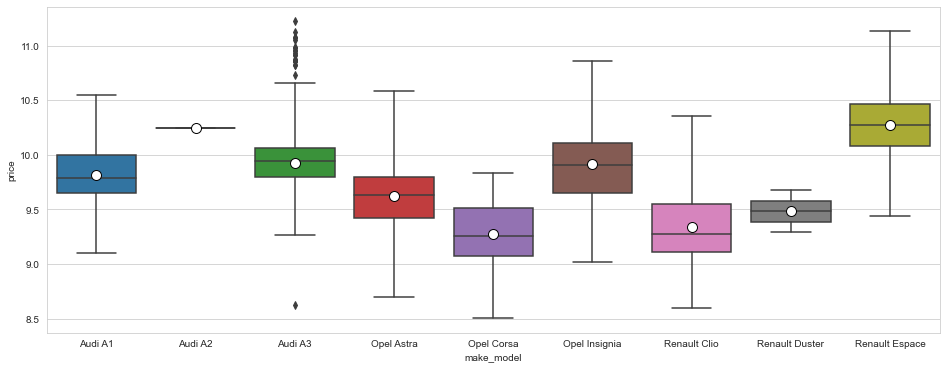

In [27]:
plt.figure(figsize=(16, 6))

sns.boxplot(x="make_model",
            y=np.log(df.price),
            data=df,
            whis=2.3,
            showmeans=True,
            meanprops={
                "marker": "o",
                "markerfacecolor": "white",
                "markeredgecolor": "black",
                "markersize": "10"
            })

plt.show()

We have determined that the price range is very wide especially in the Audi A3 car. Therefore, according to the boxplot we created, a large number of outliers were formed. According to our research and domain knowledge, most of these values are possible extreme values. Therefore, although we deleted the very small values, which was impossible, we did not delete the high values.

## - km

In [28]:
df["km"].describe()

count    15915.000
mean     32095.213
std      36975.014
min          0.000
25%       2190.536
50%      20413.000
75%      46914.000
max     317000.000
Name: km, dtype: float64

In [29]:
df["km"].sort_values().head(10)

9925    0.000
9878    0.000
7697    0.000
9888    0.000
12508   0.000
2370    0.000
9931    0.000
15664   0.000
5553    0.000
5017    0.000
Name: km, dtype: float64

In [30]:
df["km"].sort_values().tail(10)

10491   222346.000
6398    229500.000
6062    230928.000
6379    231879.000
10800   232000.000
15273   240000.000
6223    248000.000
5712    260000.000
3003    291800.000
9275    317000.000
Name: km, dtype: float64

In [33]:
df[df["km"] >= 260000]

,make_model,body_type,price,km,kW,Type,Previous Owners,Nr. of Doors,Nr. of Seats,Gearing Type,Drive chain,Fuel,CO2 Emission,comfort_convenience,entertainment_media,Extras,safety_security,Gears,Inspection_new,age,Upholstery_type,Displacement_cc,Weight_kg,cons_comb
3003,Audi A3,Sedans,14980,291800.000,110.000,Used,1.000,4.000,5.000,Manual,4WD,Diesel,125.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,On-bo...","Alloy wheels,Sport package,Sport seats,Sport s...","ABS,Adaptive headlights,Central door lock,Dayt...",6.000,No,3.000,Cloth,1968.000,1360.000,4.700
5712,Opel Astra,Station wagon,6000,260000.000,100.000,Used,1.000,5.000,5.000,Automatic,front,Diesel,119.000,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Roof rack,Touch screen,Trailer hi...","ABS,Central door lock,Central door lock with r...",6.000,No,3.000,Cloth,1598.000,1425.000,4.500
9275,Opel Corsa,Sedans,8350,317000.000,66.000,Used,1.000,3.000,5.000,Manual,front,Benzine,136.000,"Air conditioning,Hill Holder,Power windows",On-board computer,Alloy wheels,"ABS,Central door lock with remote control,Dayt...",5.000,No,2.000,Cloth,1398.000,1199.000,6.000


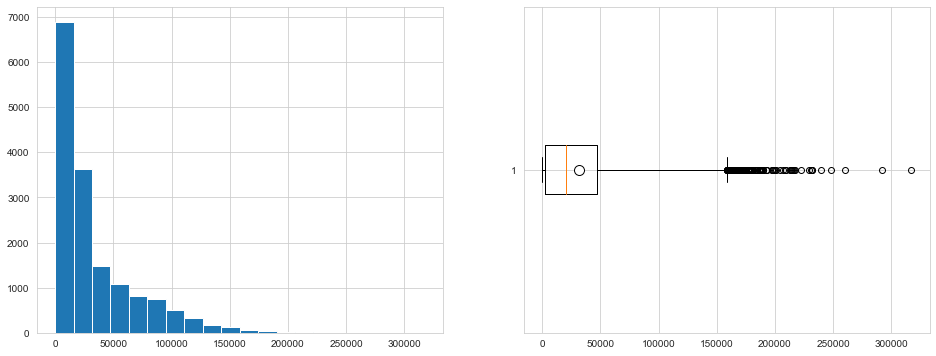

In [34]:
plt.figure(figsize=(16, 6))

plt.subplot(121)
plt.hist(df.km, bins=20)

plt.subplot(122)
plt.boxplot(df.km,
            vert=False,
            whis=2.5,
            showmeans=True,
            meanprops={
                "marker": "o",
                "markerfacecolor": "white",
                "markeredgecolor": "black",
                "markersize": "10"
            })

plt.show()

## - kW

In [35]:
df["kW"].describe()

count   15915.000
mean       87.883
std        27.553
min         0.000
25%        66.000
50%        85.000
75%       101.000
max       294.000
Name: kW, dtype: float64

In [36]:
df["kW"].sort_values().head(15)

13629   0.000
13860   0.000
11009   0.000
1269    0.000
11008   0.000
10906   0.000
13562   0.000
10905   0.000
8268    0.000
11159   0.000
13947   0.000
10582   0.000
13566   0.000
13568   0.000
13645   0.000
Name: kW, dtype: float64

In [37]:
df["kW"].sort_values().tail(15)

3602   294.000
3601   294.000
3598   294.000
3610   294.000
3595   294.000
3606   294.000
3648   294.000
3649   294.000
3593   294.000
3592   294.000
3590   294.000
3587   294.000
3599   294.000
3596   294.000
3600   294.000
Name: kW, dtype: float64

In [39]:
np.sort(df.kW.unique())

array([  0.,   1.,   4.,   9.,  40.,  44.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  60.,  63.,  65.,  66.,  67.,  70.,  71.,  74.,  75.,
        76.,  77.,  78.,  80.,  81.,  82.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  92.,  93.,  96.,  98., 100., 101., 103., 104., 110.,
       112., 115., 117., 118., 119., 120., 121., 122., 123., 125., 127.,
       132., 133., 135., 137., 140., 141., 143., 146., 147., 149., 150.,
       154., 155., 162., 163., 164., 165., 167., 168., 184., 191., 195.,
       228., 239., 270., 294.])

In [40]:
df[df["kW"] == 0].kW.count()

88

In [41]:
df[df["kW"] == 1].kW.count()

20

In [42]:
df[df["kW"] == 4].kW.count()

1

In [43]:
df[df["kW"] == 9].kW.count()

1

In [44]:
df.kW.loc[df.kW < 32] = np.nan

# Opel Corsa has a 32 kW model

In [47]:
df[df["kW"] > 228]

,make_model,body_type,price,km,kW,Type,Previous Owners,Nr. of Doors,Nr. of Seats,Gearing Type,Drive chain,Fuel,CO2 Emission,comfort_convenience,entertainment_media,Extras,safety_security,Gears,Inspection_new,age,Upholstery_type,Displacement_cc,Weight_kg,cons_comb
3587,Audi A3,Sedans,64900,35000.000,294.000,Used,1.000,5.000,5.000,Semi-automatic,front,Benzine,189.000,"Air conditioning,Seat ventilation,Split rear s...",Radio,Alloy wheels,"Adaptive Cruise Control,Alarm system,Central d...",7.000,No,1.000,Cloth,2480.000,1585.000,8.300
3590,Audi A3,Sedans,62900,700.000,294.000,Used,1.000,5.000,5.000,Semi-automatic,front,Benzine,194.000,"Air conditioning,Seat ventilation,Split rear s...","Bluetooth,Radio",Alloy wheels,"ABS,Adaptive Cruise Control,Alarm system,Centr...",7.000,No,0.000,Cloth,2480.000,1585.000,8.300
3592,Audi A3,Sedans,56900,5200.000,294.000,Used,1.000,5.000,5.000,Semi-automatic,4WD,Benzine,189.000,"Air conditioning,Air suspension,Armrest,Automa...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Shift paddles,Sport package,Sport...","ABS,Adaptive Cruise Control,Adaptive headlight...",7.000,No,1.000,Full leather,2480.000,1585.000,8.300
3593,Audi A3,Sedans,58500,10000.000,294.000,Used,1.000,5.000,5.000,Semi-automatic,front,Benzine,189.000,"Air conditioning,Seat ventilation,Split rear s...",Radio,Alloy wheels,"Adaptive Cruise Control,Alarm system,Central d...",7.000,No,1.000,Cloth,2480.000,1585.000,8.300
3595,Audi A3,Station wagon,63900,10.000,294.000,Used,1.000,5.000,5.000,Semi-automatic,front,Benzine,189.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Shift paddles,Ski bag,Sport packa...","ABS,Adaptive Cruise Control,Adaptive headlight...",7.000,No,0.000,Part leather,2480.000,1585.000,8.300
3596,Audi A3,Sedans,57400,63000.000,294.000,Used,1.000,5.000,5.000,Semi-automatic,4WD,Benzine,189.000,"Air conditioning,Air suspension,Armrest,Automa...","Bluetooth,CD player,Hands-free equipment,On-bo...","Alloy wheels,Sport seats,Sport suspension,Tune...","ABS,Adaptive Cruise Control,Adaptive headlight...",7.000,No,1.000,Full leather,2480.000,1585.000,8.300
3598,Audi A3,Sedans,55000,24000.000,294.000,Used,1.000,5.000,5.000,Semi-automatic,front,Benzine,189.000,"Air conditioning,Seat ventilation,Split rear s...",Radio,Alloy wheels,"Adaptive Cruise Control,Alarm system,Central d...",7.000,No,2.000,Cloth,2480.000,1585.000,8.300
3599,Audi A3,Sedans,55000,30000.000,294.000,Used,1.000,4.000,5.000,Semi-automatic,front,Benzine,188.000,"Air conditioning,Seat ventilation,Split rear s...",Radio,Alloy wheels,"Adaptive Cruise Control,Alarm system,Central d...",7.000,No,1.000,Cloth,2480.000,1590.000,8.300
3600,Audi A3,Sedans,53000,4000.000,294.000,Used,1.000,4.000,5.000,Semi-automatic,front,Benzine,188.000,"Air conditioning,Air suspension,Armrest,Automa...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Catalytic Converter,Shift paddles...","Adaptive Cruise Control,Adaptive headlights,Al...",7.000,No,1.000,Cloth,2480.000,1590.000,8.300
3601,Audi A3,Sedans,51900,19000.000,294.000,Used,1.000,5.000,5.000,Semi-automatic,front,Benzine,189.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,Hands-free equipment,M...","Alloy wheels,Catalytic Converter,Shift paddles...","ABS,Adaptive Cruise Control,Adaptive headlight...",7.000,No,2.000,Cloth,2480.000,1585.000,8.300


In [48]:
df["kW"].isnull().sum()

110

In [49]:
df.sample(30).groupby(["make_model", "Displacement_cc", "kW"]).kW.describe()

count    mean   std     min     25%  \
make_model     Displacement_cc kW                                             
Audi A1        999.000         70.000   3.000  70.000 0.000  70.000  70.000   
               1422.000        66.000   1.000  66.000   NaN  66.000  66.000   
               1598.000        85.000   1.000  85.000   NaN  85.000  85.000   
Audi A3        999.000         85.000   1.000  85.000   NaN  85.000  85.000   
               1598.000        85.000   2.000  85.000 0.000  85.000  85.000   
Opel Astra     999.000         77.000   1.000  77.000   NaN  77.000  77.000   
               1399.000        110.000  2.000 110.000 0.000 110.000 110.000   
               1400.000        92.000   1.000  92.000   NaN  92.000  92.000   
               1598.000        81.000   2.000  81.000 0.000  81.000  81.000   
Opel Corsa     1229.000        51.000   1.000  51.000   NaN  51.000  51.000   
               1398.000        55.000   2.000  55.000 0.000  55.000  55.000   
                               66.000   3.000  66.000 0.000  66.000  66.000   
Opel Insignia  1490.000        121.000  1.000 121.000   NaN 121.000 121.000   
               1598.000        100.000  2.000 100.000 0.000 100.000 100.000   
                               147.000  1.000 147.000   NaN 147.000 147.000   
               1956.000        125.000  2.000 125.000 0.000 125.000 125.000   
               2000.000        125.000  1.000 125.000   NaN 125.000 125.000   
Renault Clio   898.000         56.000   1.000  56.000   NaN  56.000  56.000   
Renault Espace 1798.000        165.000  1.000 165.000   NaN 165.000 165.000   
               1997.000        146.000  1.000 146.000   NaN 146.000 146.000   

                                           50%     75%     max  
make_model     Displacement_cc kW                               
Audi A1        999.000         70.000   70.000  70.000  70.000  
               1422.000        66.000   66.000  66.000  66.000  
               1598.000        85.000   85.000  85.000  85.000  
Audi A3        999.000         85.000   85.000  85.000  85.000  
               1598.000        85.000   85.000  85.000  85.000  
Opel Astra     999.000         77.000   77.000  77.000  77.000  
               1399.000        110.000 110.000 110.000 110.000  
               1400.000        92.000   92.000  92.000  92.000  
               1598.000        81.000   81.000  81.000  81.000  
Opel Corsa     1229.000        51.000   51.000  51.000  51.000  
               1398.000        55.000   55.000  55.000  55.000  
                               66.000   66.000  66.000  66.000  
Opel Insignia  1490.000        121.000 121.000 121.000 121.000  
               1598.000        100.000 100.000 100.000 100.000  
                               147.000 147.000 147.000 147.000  
               1956.000        125.000 125.000 125.000 125.000  
               2000.000        125.000 125.000 125.000 125.000  
Renault Clio   898.000         56.000   56.000  56.000  56.000  
Renault Espace 1798.000        165.000 165.000 165.000 165.000  
               1997.000        146.000 146.000 146.000 146.000

In [50]:
df.kW.loc[df.kW < 51]

8407    44.000
8853    40.000
13755   40.000
Name: kW, dtype: float64

In [51]:
df[df.kW < 51]

,make_model,body_type,price,km,kW,Type,Previous Owners,Nr. of Doors,Nr. of Seats,Gearing Type,Drive chain,Fuel,CO2 Emission,comfort_convenience,entertainment_media,Extras,safety_security,Gears,Inspection_new,age,Upholstery_type,Displacement_cc,Weight_kg,cons_comb
8407,Opel Corsa,Compact,12435,21050.000,44.000,Used,1.000,5.000,5.000,Automatic,front,Benzine,128.000,"Air conditioning,Cruise control,Electrically h...","Bluetooth,CD player,Hands-free equipment,On-bo...","Alloy wheels,Sport seats","ABS,Central door lock,Daytime running lights,D...",5.000,Yes,1.000,Cloth,1364.000,1163.000,5.700
8853,Opel Corsa,Compact,7650,142.000,40.000,New,1.000,3.000,5.000,Manual,front,Benzine,128.000,Air conditioning,"Bluetooth,Hands-free equipment,MP3,On-board co...",Alloy wheels,"ABS,Central door lock,Driver-side airbag,Immob...",5.000,No,0.000,Cloth,973.000,840.000,5.200
13755,Renault Clio,Compact,5890,134500.000,40.000,Used,1.000,5.000,5.000,Manual,front,Diesel,85.000,"Air conditioning,Power windows","Bluetooth,Hands-free equipment,On-board comput...",Alloy wheels,"ABS,Central door lock,Driver-side airbag,Immob...",5.000,No,3.000,Cloth,1461.000,1165.000,3.300


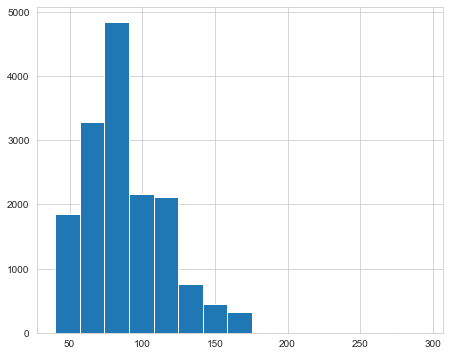

In [53]:
plt.figure(figsize=(16, 6))

plt.subplot(121)
plt.hist(df.kW, bins=15)

plt.show()

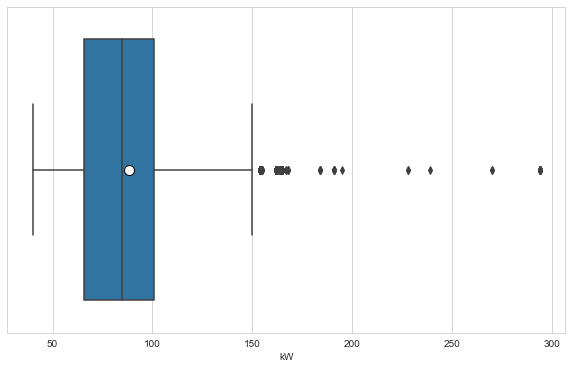

In [54]:
sns.boxplot(data=df,
            x='kW',
            showmeans=True,
            meanprops={
                "marker": "o",
                "markerfacecolor": "white",
                "markeredgecolor": "black",
                "markersize": "10"
            });

In [55]:
for group1 in list(df["make_model"].unique()):
    for group2 in list(df["body_type"].unique()):
        for group3 in list(df["Displacement_cc"].unique()):
            cond1 = df["make_model"] == group1
            cond2 = (df["make_model"] == group1) & (df["body_type"] == group2)
            cond3 = (df["make_model"] == group1) & (
                df["body_type"] == group2) & (df["Displacement_cc"] == group3)
            mode1 = list(df[cond1]["kW"].mode())
            mode2 = list(df[cond2]["kW"].mode())
            mode3 = list(df[cond3]["kW"].mode())
            if mode3 != []:
                df.loc[cond3, "kW"] = df.loc[cond3, "kW"].fillna(
                    df[cond3]["kW"].mode()[0])
            elif mode2 != []:
                df.loc[cond3, "kW"] = df.loc[cond3, "kW"].fillna(
                    df[cond2]["kW"].mode()[0])
            elif mode1 != []:
                df.loc[cond3, "kW"] = df.loc[cond3, "kW"].fillna(
                    df[cond1]["kW"].mode()[0])
            else:
                df.loc[cond3,
                       "kW"] = df.loc[cond3,
                                         "kW"].fillna(df["kW"].mode()[0])

In [56]:
df["kW"].isnull().sum()

0

## - Previous Owners

In [57]:
df["Previous Owners"].describe()

count   15915.000
mean        1.042
std         0.340
min         0.000
25%         1.000
50%         1.000
75%         1.000
max         4.000
Name: Previous Owners, dtype: float64

In [58]:
df["Previous Owners"].value_counts(dropna=False)

1.000    14150
2.000     1171
0.000      563
3.000       29
4.000        2
Name: Previous Owners, dtype: int64

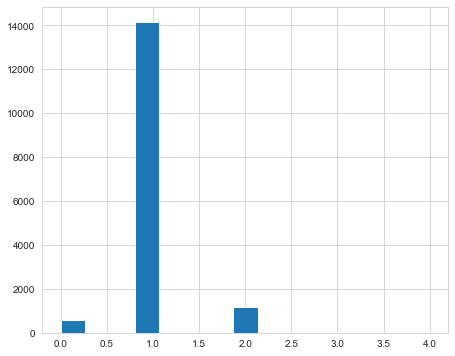

In [60]:
plt.figure(figsize=(16, 6))

plt.subplot(121)
plt.hist(df['Previous Owners'], bins=15)

plt.show()

## - Nr. of Doors

In [61]:
df["Nr. of Doors"].describe()

count   15915.000
mean        4.661
std         0.642
min         1.000
25%         4.000
50%         5.000
75%         5.000
max         7.000
Name: Nr. of Doors, dtype: float64

In [62]:
df["Nr. of Doors"].value_counts(dropna=False)

5.000    11784
4.000     3079
3.000      831
2.000      219
1.000        1
7.000        1
Name: Nr. of Doors, dtype: int64

In [63]:
df["Nr. of Doors"].replace([1, 7], np.nan, inplace=True)

In [64]:
df["Nr. of Doors"].value_counts(dropna = False)

5.000    11784
4.000     3079
3.000      831
2.000      219
NaN          2
Name: Nr. of Doors, dtype: int64

In [65]:
fill_with(df, "make_model", "body_type", "Nr. of Doors", "mode")

Number of NaN :  0
------------------
5.000    11786
4.000     3079
3.000      831
2.000      219
Name: Nr. of Doors, dtype: int64


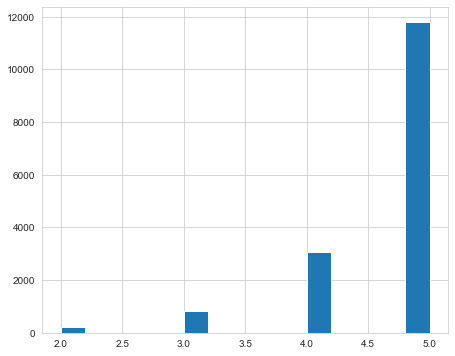

In [66]:
plt.figure(figsize=(16, 6))

plt.subplot(121)
plt.hist(df['Nr. of Doors'], bins=15)

plt.show()

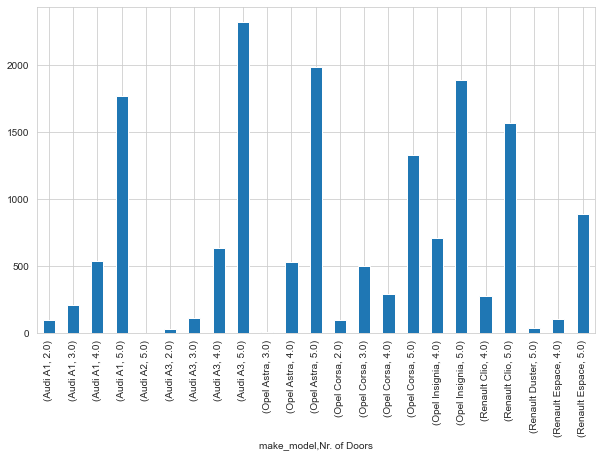

In [67]:
df.groupby(["make_model", "Nr. of Doors"])["Nr. of Doors"].count().plot.bar();

## - Nr. of Seats

In [70]:
df["Nr. of Seats"].describe()

count   15915.000
mean        4.952
std         0.477
min         2.000
25%         5.000
50%         5.000
75%         5.000
max         7.000
Name: Nr. of Seats, dtype: float64

In [71]:
df["Nr. of Seats"].value_counts(dropna=False)

5.000    14304
4.000     1127
7.000      362
2.000      119
6.000        2
3.000        1
Name: Nr. of Seats, dtype: int64

In [72]:
df[df["Nr. of Seats"] == 3]

,make_model,body_type,price,km,kW,Type,Previous Owners,Nr. of Doors,Nr. of Seats,Gearing Type,Drive chain,Fuel,CO2 Emission,comfort_convenience,entertainment_media,Extras,safety_security,Gears,Inspection_new,age,Upholstery_type,Displacement_cc,Weight_kg,cons_comb
1636,Audi A1,Compact,23090,9821.000,141.000,Used,1.000,2.000,3.000,Automatic,front,Benzine,134.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Catalytic Converter,Sport package...","ABS,Central door lock,Daytime running lights,D...",7.000,Yes,1.000,Part leather,1798.000,1180.000,5.800


In [73]:
df[df["Nr. of Seats"] == 6]

,make_model,body_type,price,km,kW,Type,Previous Owners,Nr. of Doors,Nr. of Seats,Gearing Type,Drive chain,Fuel,CO2 Emission,comfort_convenience,entertainment_media,Extras,safety_security,Gears,Inspection_new,age,Upholstery_type,Displacement_cc,Weight_kg,cons_comb
582,Audi A1,Compact,13500,100000.000,70.000,Used,1.000,5.000,6.000,Manual,front,Benzine,104.000,Air conditioning,On-board computer,Alloy wheels,ABS,5.000,No,2.000,Cloth,1000.000,1500.000,4.900
15886,Renault Espace,Station wagon,42490,2190.536,147.000,New,1.000,5.000,6.000,Automatic,front,Diesel,168.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Touch screen","ABS,Blind spot monitor,Central door lock,Dayti...",6.000,No,0.000,Cloth,1997.000,1840.000,5.700


In [76]:
df["Nr. of Seats"].loc[(df["make_model"] == "Audi A1") & ((df["Nr. of Seats"] == 3) | (df["Nr. of Seats"] == 6))] = np.nan

In [77]:
df[df["Nr. of Seats"] == 3]

,make_model,body_type,price,km,kW,Type,Previous Owners,Nr. of Doors,Nr. of Seats,Gearing Type,Drive chain,Fuel,CO2 Emission,comfort_convenience,entertainment_media,Extras,safety_security,Gears,Inspection_new,age,Upholstery_type,Displacement_cc,Weight_kg,cons_comb


In [78]:
df[df["Nr. of Seats"] == 6]

,make_model,body_type,price,km,kW,Type,Previous Owners,Nr. of Doors,Nr. of Seats,Gearing Type,Drive chain,Fuel,CO2 Emission,comfort_convenience,entertainment_media,Extras,safety_security,Gears,Inspection_new,age,Upholstery_type,Displacement_cc,Weight_kg,cons_comb
15886,Renault Espace,Station wagon,42490,2190.536,147.000,New,1.000,5.000,6.000,Automatic,front,Diesel,168.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Touch screen","ABS,Blind spot monitor,Central door lock,Dayti...",6.000,No,0.000,Cloth,1997.000,1840.000,5.700


In [79]:
df["Nr. of Seats"].isnull().sum()

2

In [80]:
fill_with(df, "make_model", "body_type", "Nr. of Seats", "mode")

Number of NaN :  0
------------------
5.000    14306
4.000     1127
7.000      362
2.000      119
6.000        1
Name: Nr. of Seats, dtype: int64


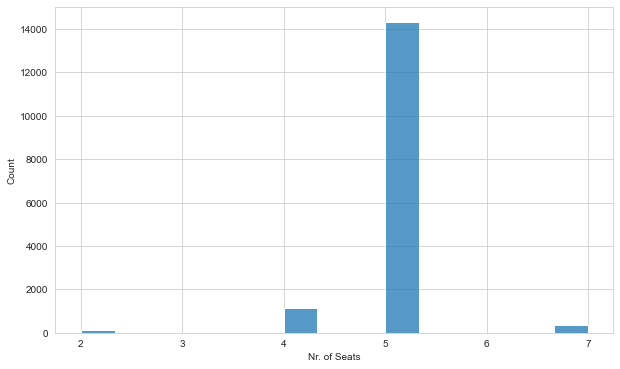

In [81]:
sns.histplot(data=df, x='Nr. of Seats');

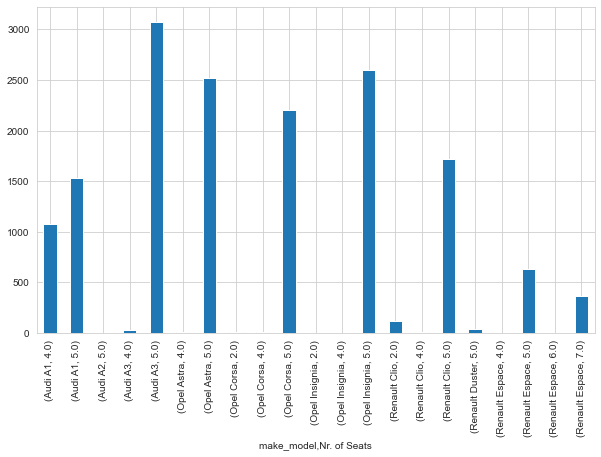

In [82]:
df.groupby(["make_model", "Nr. of Seats"])["Nr. of Seats"].count().plot.bar();

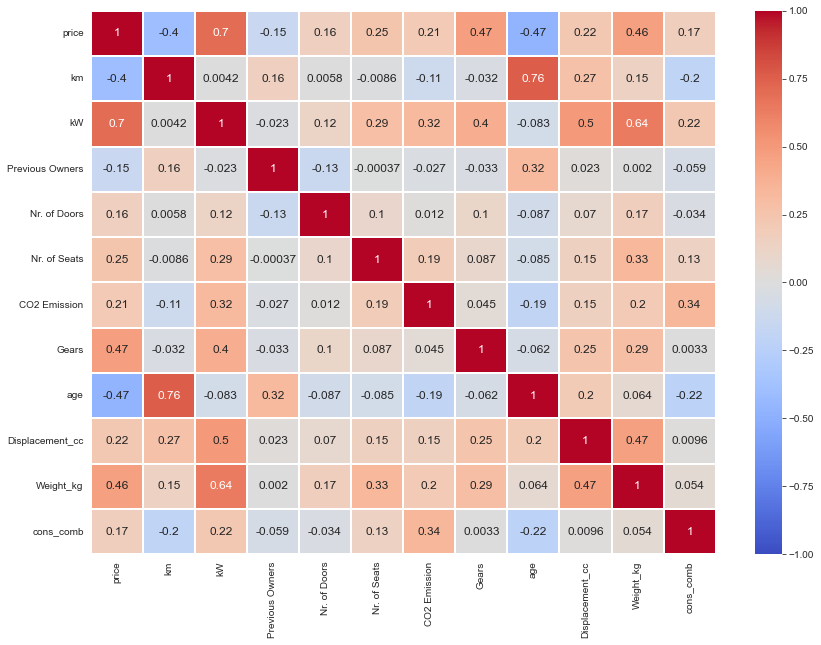

In [83]:
plt.figure(figsize=(14, 10))

sns.heatmap(df.corr(),
            annot=True,
            center=0,
            vmin=-1,
            cmap="coolwarm",
            linewidths=0.2,
            annot_kws={"size": 12});

## - CO2 Emission

In [84]:
df["CO2 Emission"].describe()

count   15915.000
mean      110.281
std        34.001
min         0.000
25%       103.000
50%       116.000
75%       128.000
max       990.000
Name: CO2 Emission, dtype: float64

In [85]:
# Lowest CO2 Emission of cars is 79 g/km

In [86]:
df["CO2 Emission"].value_counts(dropna=False)

120.000    1081
97.000      742
104.000     739
99.000      545
128.000     533
           ... 
990.000       1
80.000        1
160.000       1
331.000       1
193.000       1
Name: CO2 Emission, Length: 122, dtype: int64

In [87]:
np.sort(df["CO2 Emission"].unique())

array([  0.       ,   1.       ,   1.06     ,   5.       ,   8.       ,
         9.       ,  10.       ,  11.       ,  12.087    ,  12.324    ,
        13.       ,  13.983    ,  14.       ,  14.457    ,  15.       ,
        16.       ,  17.       ,  36.       ,  45.       ,  51.       ,
        80.       ,  84.       ,  85.       ,  87.       ,  88.       ,
        89.       ,  90.       ,  91.       ,  93.       ,  94.       ,
        95.       ,  96.       ,  97.       ,  97.5      ,  98.       ,
        99.       , 100.       , 101.       , 103.       , 104.       ,
       105.       , 106.       , 107.       , 108.       , 109.       ,
       109.1378297, 110.       , 111.       , 113.       , 114.       ,
       115.       , 116.       , 117.       , 118.       , 119.       ,
       120.       , 121.       , 123.       , 124.       , 125.       ,
       126.       , 127.       , 128.       , 129.       , 130.       ,
       131.       , 133.       , 134.       , 135.       , 136. 

In [88]:
df[(df["CO2 Emission"] < 79) | (df["CO2 Emission"] > 300)]

,make_model,body_type,price,km,kW,Type,Previous Owners,Nr. of Doors,Nr. of Seats,Gearing Type,Drive chain,Fuel,CO2 Emission,comfort_convenience,entertainment_media,Extras,safety_security,Gears,Inspection_new,age,Upholstery_type,Displacement_cc,Weight_kg,cons_comb
5,Audi A1,Sedans,15090,63668.000,85.000,Used,1.000,4.000,5.000,Automatic,front,Diesel,9.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport package,Sport seats,Sport s...","ABS,Central door lock,Daytime running lights,D...",7.000,No,3.000,Part leather,1598.000,1135.000,3.500
11,Audi A1,Sedans,17990,26415.000,92.000,Used,1.000,4.000,5.000,Automatic,front,Benzine,11.000,"Air conditioning,Automatic climate control,Ele...","CD player,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats","ABS,Central door lock,Daytime running lights,D...",7.000,Yes,3.000,Cloth,1395.000,1135.000,4.900
12,Audi A1,Sedans,18380,31600.000,92.000,Used,1.000,5.000,5.000,Automatic,front,Benzine,11.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Catalytic Converter,Sport package...","ABS,Central door lock,Daytime running lights,D...",7.000,No,3.000,Part leather,1395.000,1135.000,4.900
16,Audi A1,Sedans,18900,9752.000,85.000,Used,1.000,5.000,4.000,Automatic,front,Diesel,9.000,"Air conditioning,Leather steering wheel,Power ...","CD player,MP3,Radio","Alloy wheels,Sport package,Sport seats","Central door lock,Driver-side airbag,Electroni...",5.000,No,1.000,Cloth,1598.000,1175.000,3.500
21,Audi A1,Sedans,18500,15850.000,92.000,Used,1.000,5.000,5.000,Automatic,front,Benzine,11.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Central door lock,Central door lock with r...",7.000,Yes,3.000,Cloth,1395.000,1180.000,4.900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15846,Renault Espace,Van,45890,500.000,147.000,Demonstration,1.000,5.000,7.000,Automatic,front,Diesel,14.000,"Air conditioning,Automatic climate control,Ele...","Bluetooth,Hands-free equipment,On-board comput...",Alloy wheels,"Adaptive Cruise Control,Adaptive headlights,Bl...",6.000,No,0.000,Full leather,1997.000,1765.000,5.400
15857,Renault Espace,Van,43490,4252.000,165.000,Demonstration,0.000,5.000,7.000,Automatic,front,Benzine,15.000,"Air conditioning,Armrest,Automatic climate con...",Hands-free equipment,"Alloy wheels,Voice Control","ABS,Adaptive Cruise Control,Alarm system,Blind...",6.000,No,0.000,Part leather,1798.000,1624.000,6.800
15863,Renault Espace,Van,49490,3353.000,165.000,Demonstration,1.000,5.000,5.000,Automatic,front,Benzine,15.000,"Air conditioning,Armrest,Automatic climate con...","Hands-free equipment,Radio","Alloy wheels,Voice Control","ABS,Alarm system,Blind spot monitor,Daytime ru...",6.000,No,0.000,Full leather,1798.000,1585.000,6.800
15869,Renault Espace,Van,48900,12.000,165.000,Used,1.000,5.000,5.000,Automatic,front,Benzine,15.000,"Air conditioning,Armrest,Automatic climate con...","On-board computer,Radio",Alloy wheels,"Central door lock,Driver-side airbag,Passenger...",7.000,No,0.000,Part leather,1798.000,1585.000,6.800


In [89]:
df.loc[(df["CO2 Emission"] < 79) | (df["CO2 Emission"] > 300) , "CO2 Emission"] = np.nan

In [90]:
df["CO2 Emission"].value_counts(dropna=False)

NaN        1189
120.000    1081
97.000      742
104.000     739
99.000      545
           ... 
253.000       1
160.000       1
80.000        1
165.000       1
193.000       1
Name: CO2 Emission, Length: 101, dtype: int64

In [91]:
for group1 in list(df["make_model"].unique()):
    for group2 in list(df["body_type"].unique()):
        for group3 in list(df["Fuel"].unique()):
            cond1 = df["make_model"] == group1
            cond2 = (df["make_model"] == group1) & (df["body_type"] == group2)
            cond3 = (df["make_model"] == group1) & (
                df["body_type"] == group2) & (df["Fuel"] == group3)
            mode1 = list(df[cond1]["CO2 Emission"].mode())
            mode2 = list(df[cond2]["CO2 Emission"].mode())
            mode3 = list(df[cond3]["CO2 Emission"].mode())
            if mode3 != []:
                df.loc[cond3,
                       "CO2 Emission"] = df.loc[cond3, "CO2 Emission"].fillna(
                           df[cond3]["CO2 Emission"].mode()[0])
            elif mode2 != []:
                df.loc[cond3,
                       "CO2 Emission"] = df.loc[cond3, "CO2 Emission"].fillna(
                           df[cond2]["CO2 Emission"].mode()[0])
            elif mode1 != []:
                df.loc[cond3,
                       "CO2 Emission"] = df.loc[cond3, "CO2 Emission"].fillna(
                           df[cond1]["CO2 Emission"].mode()[0])
            else:
                df.loc[cond3,
                       "CO2 Emission"] = df.loc[cond3, "CO2 Emission"].fillna(
                           df["CO2 Emission"].mode()[0])

In [92]:
df["CO2 Emission"].value_counts(dropna=False)

120.000    1086
104.000    1037
97.000     1032
128.000     627
134.000     588
           ... 
253.000       1
80.000        1
160.000       1
109.138       1
193.000       1
Name: CO2 Emission, Length: 100, dtype: int64

In [93]:
np.sort(df["CO2 Emission"].unique())

array([ 80.       ,  84.       ,  85.       ,  87.       ,  88.       ,
        89.       ,  90.       ,  91.       ,  93.       ,  94.       ,
        95.       ,  96.       ,  97.       ,  97.5      ,  98.       ,
        99.       , 100.       , 101.       , 103.       , 104.       ,
       105.       , 106.       , 107.       , 108.       , 109.       ,
       109.1378297, 110.       , 111.       , 113.       , 114.       ,
       115.       , 116.       , 117.       , 118.       , 119.       ,
       120.       , 121.       , 123.       , 124.       , 125.       ,
       126.       , 127.       , 128.       , 129.       , 130.       ,
       131.       , 133.       , 134.       , 135.       , 136.       ,
       137.       , 138.       , 139.       , 140.       , 141.       ,
       143.       , 144.       , 145.       , 146.       , 147.       ,
       148.       , 149.       , 150.       , 151.       , 153.       ,
       154.       , 155.       , 156.       , 157.       , 158. 

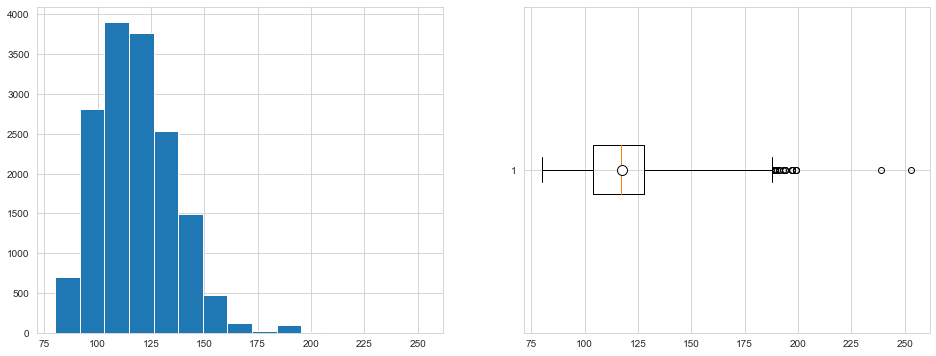

In [94]:
plt.figure(figsize=(16, 6))

plt.subplot(121)
plt.hist(df['CO2 Emission'], bins=15)

plt.subplot(122)
plt.boxplot(df['CO2 Emission'],
            vert=False,
            whis=2.5,
            showmeans=True,
            meanprops={
                "marker": "o",
                "markerfacecolor": "white",
                "markeredgecolor": "black",
                "markersize": "10"
            })

plt.show()

## - Gears

In [95]:
df["Gears"].describe()

count   15915.000
mean        5.940
std         0.792
min         1.000
25%         5.000
50%         6.000
75%         6.000
max        50.000
Name: Gears, dtype: float64

In [96]:
df["Gears"].value_counts(dropna=False)

6.000     8612
5.000     4254
7.000     2810
8.000      225
9.000        6
1.000        2
3.000        2
4.000        2
2.000        1
50.000       1
Name: Gears, dtype: int64

In [97]:
df[df["Gears"].isin([1, 2, 3, 4, 9, 50])]

,make_model,body_type,price,km,kW,Type,Previous Owners,Nr. of Doors,Nr. of Seats,Gearing Type,Drive chain,Fuel,CO2 Emission,comfort_convenience,entertainment_media,Extras,safety_security,Gears,Inspection_new,age,Upholstery_type,Displacement_cc,Weight_kg,cons_comb
8917,Opel Corsa,Compact,11000,24000.000,66.000,Used,1.000,5.000,5.000,Semi-automatic,front,Benzine,128.000,"Air conditioning,Light sensor,Multi-function s...","Bluetooth,On-board computer,Radio,USB","Alloy wheels,Touch screen","ABS,Central door lock,Central door lock with r...",1.000,No,1.000,Cloth,1398.000,1163.000,4.800
9808,Opel Corsa,Sedans,9880,19247.000,51.000,Used,1.000,5.000,5.000,Manual,front,Benzine,128.000,"Air conditioning,Light sensor,Navigation syste...","Bluetooth,On-board computer",Alloy wheels,"ABS,Central door lock,Driver-side airbag,Fog l...",2.000,No,1.000,Cloth,1229.000,1163.000,5.400
14371,Renault Clio,Compact,23990,10.000,147.000,Demonstration,1.000,4.000,5.000,Automatic,front,Benzine,120.000,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Hands-free equipment,On-board computer","Alloy wheels,Sport package,Sport seats,Sport s...","ABS,Central door lock,Daytime running lights,D...",1.000,No,1.000,Cloth,1618.000,1288.000,5.900
14491,Renault Clio,Sedans,10798,10.000,56.000,Pre-registered,1.000,5.000,5.000,Manual,front,Benzine,118.000,"Air conditioning,Cruise control,Electrical sid...",USB,Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",50.000,No,0.000,Cloth,898.000,1165.000,5.200
15808,Renault Espace,Van,54982,11.000,165.000,New,1.000,5.000,5.000,Automatic,front,Benzine,153.000,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",9.000,No,0.000,Part leather,1798.000,1647.000,7.600
15810,Renault Espace,Van,54982,11.000,165.000,New,1.000,5.000,5.000,Automatic,front,Benzine,153.000,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",9.000,No,0.000,Part leather,1798.000,1647.000,7.600
15813,Renault Espace,Van,54204,11.000,146.000,New,1.000,5.000,5.000,Automatic,front,Diesel,120.000,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",3.000,No,0.000,Part leather,1997.000,1779.000,5.400
15818,Renault Espace,Van,50950,11.000,165.000,New,1.000,5.000,5.000,Automatic,front,Benzine,153.000,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",4.000,No,0.000,Cloth,1798.000,1647.000,7.600
15819,Renault Espace,Van,50950,11.000,165.000,New,1.000,5.000,5.000,Automatic,front,Benzine,153.000,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",4.000,No,0.000,Cloth,1798.000,1647.000,7.600
15820,Renault Espace,Van,52711,11.000,165.000,New,1.000,5.000,5.000,Automatic,front,Benzine,153.000,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",9.000,No,0.000,Part leather,1798.000,1608.000,7.400


In [98]:
df.loc[(df["Gears"].isin([1, 2, 3, 4, 9, 50])) , "Gears"] = np.nan

In [99]:
df["Gears"].value_counts(dropna=False)

6.000    8612
5.000    4254
7.000    2810
8.000     225
NaN        14
Name: Gears, dtype: int64

In [100]:
for group1 in list(df["make_model"].unique()):
    for group2 in list(df["body_type"].unique()):
        for group3 in list(df["Gearing Type"].unique()):
            cond1 = df["make_model"] == group1
            cond2 = (df["make_model"] == group1) & (df["body_type"] == group2)
            cond3 = (df["make_model"] == group1) & (
                df["body_type"] == group2) & (df["Gearing Type"] == group3)
            mode1 = list(df[cond1]["Gears"].mode())
            mode2 = list(df[cond2]["Gears"].mode())
            mode3 = list(df[cond3]["Gears"].mode())
            if mode3 != []:
                df.loc[cond3, "Gears"] = df.loc[cond3, "Gears"].fillna(
                    df[cond3]["Gears"].mode()[0])
            elif mode2 != []:
                df.loc[cond3, "Gears"] = df.loc[cond3, "Gears"].fillna(
                    df[cond2]["Gears"].mode()[0])
            elif mode1 != []:
                df.loc[cond3, "Gears"] = df.loc[cond3, "Gears"].fillna(
                    df[cond1]["Gears"].mode()[0])
            else:
                df.loc[cond3,
                       "Gears"] = df.loc[cond3,
                                         "Gears"].fillna(df["Gears"].mode()[0])

In [101]:
df["Gears"].value_counts(dropna=False)

6.000    8623
5.000    4257
7.000    2810
8.000     225
Name: Gears, dtype: int64

## - age

In [102]:
df["age"].describe()

count   15915.000
mean        1.390
std         1.121
min         0.000
25%         0.000
50%         1.000
75%         2.000
max         3.000
Name: age, dtype: float64

In [103]:
df["age"].value_counts(dropna=False)

1.000    4526
0.000    4433
3.000    3679
2.000    3277
Name: age, dtype: int64

## - Displacement_cc

In [104]:
df["Displacement_cc"].describe()

count   15915.000
mean     1425.738
std       330.638
min         1.000
25%      1229.000
50%      1461.000
75%      1598.000
max     16000.000
Name: Displacement_cc, dtype: float64

In [105]:
np.sort(df["Displacement_cc"].unique())

array([1.0000e+00, 2.0000e+00, 5.4000e+01, 1.2200e+02, 1.3900e+02,
       1.4000e+02, 1.6000e+02, 8.9000e+02, 8.9800e+02, 8.9900e+02,
       9.0000e+02, 9.2900e+02, 9.7300e+02, 9.9500e+02, 9.9600e+02,
       9.9700e+02, 9.9800e+02, 9.9900e+02, 1.0000e+03, 1.1000e+03,
       1.1490e+03, 1.1950e+03, 1.1970e+03, 1.1980e+03, 1.1990e+03,
       1.2000e+03, 1.2290e+03, 1.2390e+03, 1.2480e+03, 1.3000e+03,
       1.3330e+03, 1.3500e+03, 1.3640e+03, 1.3680e+03, 1.3690e+03,
       1.3900e+03, 1.3950e+03, 1.3960e+03, 1.3970e+03, 1.3980e+03,
       1.3990e+03, 1.4000e+03, 1.4220e+03, 1.4610e+03, 1.4900e+03,
       1.4950e+03, 1.4960e+03, 1.4980e+03, 1.4990e+03, 1.5000e+03,
       1.5330e+03, 1.5680e+03, 1.5800e+03, 1.5840e+03, 1.5890e+03,
       1.5960e+03, 1.5980e+03, 1.5990e+03, 1.6000e+03, 1.6180e+03,
       1.6860e+03, 1.6960e+03, 1.7980e+03, 1.8000e+03, 1.8560e+03,
       1.8960e+03, 1.9560e+03, 1.9680e+03, 1.9840e+03, 1.9950e+03,
       1.9970e+03, 1.9980e+03, 2.0000e+03, 2.4800e+03, 2.9670e

In [106]:
df[2480 < df["Displacement_cc"]]

,make_model,body_type,price,km,kW,Type,Previous Owners,Nr. of Doors,Nr. of Seats,Gearing Type,Drive chain,Fuel,CO2 Emission,comfort_convenience,entertainment_media,Extras,safety_security,Gears,Inspection_new,age,Upholstery_type,Displacement_cc,Weight_kg,cons_comb
7168,Opel Astra,Station wagon,18490,22327.000,100.000,Employee's car,1.000,5.000,5.000,Automatic,front,Benzine,119.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,MP3,On-board co...","Alloy wheels,Touch screen,Voice Control","ABS,Central door lock,Daytime running lights,D...",6.000,Yes,1.000,Cloth,15898.000,1425.000,4.500
10767,Opel Insignia,Station wagon,12000,185000.000,100.000,Used,1.000,5.000,5.000,Automatic,front,Diesel,239.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Catalytic Converter,Roof rack,Ski...","ABS,Adaptive Cruise Control,Adaptive headlight...",6.000,No,3.000,Cloth,2967.000,2295.000,9.100
10928,Opel Insignia,Station wagon,14300,76500.000,88.000,Used,1.000,5.000,5.000,Manual,front,Diesel,134.000,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Hands-free equipment,MP3,On-board co...","Alloy wheels,Touch screen,Voice Control","ABS,Central door lock,Daytime running lights,D...",6.000,No,3.000,Full leather,16000.000,1487.000,4.300


In [107]:
df[df["Displacement_cc"] < 890]

,make_model,body_type,price,km,kW,Type,Previous Owners,Nr. of Doors,Nr. of Seats,Gearing Type,Drive chain,Fuel,CO2 Emission,comfort_convenience,entertainment_media,Extras,safety_security,Gears,Inspection_new,age,Upholstery_type,Displacement_cc,Weight_kg,cons_comb
7808,Opel Astra,Sedans,23940,12.000,110.000,Pre-registered,1.000,5.000,5.000,Automatic,front,Benzine,139.000,"Air conditioning,Armrest,Automatic climate con...","MP3,On-board computer,Radio,USB","Alloy wheels,Catalytic Converter","ABS,Central door lock,Daytime running lights,D...",6.000,Yes,0.000,Cloth,139.000,1352.000,6.100
7809,Opel Astra,Sedans,23940,12.000,110.000,Pre-registered,1.000,5.000,5.000,Automatic,front,Benzine,139.000,"Air conditioning,Armrest,Automatic climate con...","MP3,On-board computer,Radio,USB","Alloy wheels,Catalytic Converter","ABS,Central door lock,Daytime running lights,D...",6.000,Yes,0.000,Cloth,139.000,1352.000,6.100
7810,Opel Astra,Sedans,23940,12.000,110.000,Pre-registered,1.000,5.000,5.000,Automatic,front,Benzine,139.000,"Air conditioning,Armrest,Automatic climate con...","MP3,On-board computer,Radio,USB","Alloy wheels,Catalytic Converter","ABS,Central door lock,Daytime running lights,D...",6.000,Yes,0.000,Cloth,139.000,1352.000,6.100
7811,Opel Astra,Sedans,23940,12.000,110.000,Pre-registered,1.000,5.000,5.000,Automatic,front,Benzine,139.000,"Air conditioning,Armrest,Automatic climate con...","On-board computer,Radio,USB","Alloy wheels,Catalytic Converter","ABS,Central door lock,Daytime running lights,D...",6.000,Yes,0.000,Cloth,139.000,1352.000,6.100
8127,Opel Astra,Station wagon,18830,10.000,92.000,Demonstration,1.000,5.000,5.000,Manual,front,Benzine,125.000,"Air conditioning,Automatic climate control,Cru...","Bluetooth,CD player,MP3,On-board computer,Radio","Alloy wheels,Roof rack,Sport seats","ABS,Central door lock,Driver-side airbag,Elect...",6.000,No,0.000,Cloth,140.000,1425.000,4.500
10190,Opel Corsa,Compact,10940,12.000,51.000,Pre-registered,1.000,3.000,5.000,Manual,front,Benzine,134.000,"Air conditioning,Electrical side mirrors,Hill ...","On-board computer,Radio",Catalytic Converter,"ABS,Central door lock,Daytime running lights,D...",5.000,Yes,0.000,Cloth,122.000,1162.000,5.900
10555,Opel Insignia,Station wagon,16950,84700.000,125.000,Used,1.000,5.000,5.000,Automatic,front,Diesel,134.000,"Air conditioning,Automatic climate control,Cru...",Sound system,"Alloy wheels,Roof rack","Blind spot monitor,Tire pressure monitoring sy...",6.000,Yes,3.000,Full leather,2.000,1487.000,4.300
12463,Opel Insignia,Station wagon,37490,2190.536,100.000,Demonstration,1.000,5.000,5.000,Automatic,front,Diesel,134.000,"Air conditioning,Automatic climate control,Cru...","Bluetooth,CD player,MP3,Radio","Alloy wheels,Roof rack","ABS,Central door lock,Driver-side airbag,Elect...",6.000,No,0.000,Part leather,1.000,1487.000,4.300
12469,Opel Insignia,Station wagon,34490,2190.536,100.000,Demonstration,1.000,5.000,5.000,Automatic,front,Diesel,134.000,"Air conditioning,Automatic climate control,Cru...",Bluetooth,"Alloy wheels,Roof rack,Sport package,Sport seats","ABS,Central door lock,Driver-side airbag,Elect...",6.000,No,0.000,Part leather,1.000,1487.000,4.300
12480,Opel Insignia,Sedans,33990,10.000,100.000,Demonstration,1.000,5.000,5.000,Automatic,front,Diesel,134.000,"Air conditioning,Automatic climate control,Cru...","Bluetooth,On-board computer",Alloy wheels,"ABS,Central door lock,Driver-side airbag,Elect...",6.000,No,0.000,Part leather,1.000,1503.000,4.300


In [108]:
df["Displacement_cc"].sort_values()

12600       1.000
14311       1.000
14310       1.000
12844       1.000
12831       1.000
           ...   
3602     2480.000
3595     2480.000
10767    2967.000
7168    15898.000
10928   16000.000
Name: Displacement_cc, Length: 15915, dtype: float64

In [109]:
df.loc[(2480 < df["Displacement_cc"]) | (df["Displacement_cc"] < 890) , "Displacement_cc"] = np.nan

In [110]:
df["Displacement_cc"].isnull().sum()

54

In [111]:
df["Displacement_cc"].value_counts(dropna=False)

1598.000    4982
999.000     2464
1398.000    1349
1399.000     765
1229.000     708
            ... 
973.000        1
996.000        1
1696.000       1
1686.000       1
1800.000       1
Name: Displacement_cc, Length: 68, dtype: int64

In [112]:
np.sort(df["Displacement_cc"].unique())

array([ 890.,  898.,  899.,  900.,  929.,  973.,  995.,  996.,  997.,
        998.,  999., 1000., 1100., 1149., 1195., 1197., 1198., 1199.,
       1200., 1229., 1239., 1248., 1300., 1333., 1350., 1364., 1368.,
       1369., 1390., 1395., 1396., 1397., 1398., 1399., 1400., 1422.,
       1461., 1490., 1495., 1496., 1498., 1499., 1500., 1533., 1568.,
       1580., 1584., 1589., 1596., 1598., 1599., 1600., 1618., 1686.,
       1696., 1798., 1800., 1856., 1896., 1956., 1968., 1984., 1995.,
       1997., 1998., 2000., 2480.,   nan])

In [113]:
for group1 in list(df["make_model"].unique()):
    for group2 in list(df["body_type"].unique()):
        for group3 in list(df["kW"].unique()):
            cond1 = df["make_model"] == group1
            cond2 = (df["make_model"] == group1) & (df["body_type"] == group2)
            cond3 = (df["make_model"] == group1) & (
                df["body_type"] == group2) & (df["kW"] == group3)
            mode1 = list(df[cond1]["Displacement_cc"].mode())
            mode2 = list(df[cond2]["Displacement_cc"].mode())
            mode3 = list(df[cond3]["Displacement_cc"].mode())
            if mode3 != []:
                df.loc[cond3, "Displacement_cc"] = df.loc[cond3, "Displacement_cc"].fillna(
                    df[cond3]["Displacement_cc"].mode()[0])
            elif mode2 != []:
                df.loc[cond3, "Displacement_cc"] = df.loc[cond3, "Displacement_cc"].fillna(
                    df[cond2]["Displacement_cc"].mode()[0])
            elif mode1 != []:
                df.loc[cond3, "Displacement_cc"] = df.loc[cond3, "Displacement_cc"].fillna(
                    df[cond1]["Displacement_cc"].mode()[0])
            else:
                df.loc[cond3,
                       "Displacement_cc"] = df.loc[cond3,
                                         "Displacement_cc"].fillna(df["Displacement_cc"].mode()[0])

In [114]:
df["Displacement_cc"].isnull().sum()

0

## - Weight_kg

In [115]:
df["Weight_kg"].describe()

count   15915.000
mean     1338.635
std       199.157
min         1.000
25%      1165.000
50%      1295.000
75%      1472.000
max      2471.000
Name: Weight_kg, dtype: float64

In [116]:
np.sort(df["Weight_kg"].unique())

array([1.000e+00, 1.020e+02, 8.400e+02, 9.000e+02, 9.770e+02, 9.800e+02,
       1.009e+03, 1.010e+03, 1.017e+03, 1.030e+03, 1.035e+03, 1.040e+03,
       1.041e+03, 1.052e+03, 1.054e+03, 1.055e+03, 1.057e+03, 1.058e+03,
       1.059e+03, 1.060e+03, 1.063e+03, 1.065e+03, 1.066e+03, 1.071e+03,
       1.079e+03, 1.082e+03, 1.084e+03, 1.086e+03, 1.087e+03, 1.088e+03,
       1.090e+03, 1.091e+03, 1.092e+03, 1.094e+03, 1.097e+03, 1.099e+03,
       1.100e+03, 1.105e+03, 1.110e+03, 1.114e+03, 1.115e+03, 1.118e+03,
       1.119e+03, 1.120e+03, 1.121e+03, 1.123e+03, 1.124e+03, 1.125e+03,
       1.126e+03, 1.127e+03, 1.128e+03, 1.130e+03, 1.132e+03, 1.133e+03,
       1.134e+03, 1.135e+03, 1.136e+03, 1.137e+03, 1.138e+03, 1.139e+03,
       1.140e+03, 1.141e+03, 1.142e+03, 1.143e+03, 1.144e+03, 1.145e+03,
       1.146e+03, 1.147e+03, 1.150e+03, 1.152e+03, 1.153e+03, 1.154e+03,
       1.155e+03, 1.156e+03, 1.157e+03, 1.159e+03, 1.160e+03, 1.161e+03,
       1.162e+03, 1.163e+03, 1.164e+03, 1.165e+03, 

In [117]:
df["Weight_kg"].value_counts(dropna=False)

1163.000    1581
1360.000    1419
1487.000     966
1165.000     855
1135.000     837
            ... 
1331.000       1
1132.000       1
1252.000       1
1792.000       1
2037.000       1
Name: Weight_kg, Length: 434, dtype: int64

In [118]:
df[df["Weight_kg"] < 840]

,make_model,body_type,price,km,kW,Type,Previous Owners,Nr. of Doors,Nr. of Seats,Gearing Type,Drive chain,Fuel,CO2 Emission,comfort_convenience,entertainment_media,Extras,safety_security,Gears,Inspection_new,age,Upholstery_type,Displacement_cc,Weight_kg,cons_comb
1143,Audi A1,Compact,19229,8263.000,70.000,Used,1.000,5.000,4.000,Automatic,front,Benzine,104.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Catalytic Converter,Sport seats,S...","ABS,Central door lock,Daytime running lights,D...",7.000,Yes,1.000,Cloth,999.000,102.000,4.600
8354,Opel Corsa,Compact,12945,2015.000,66.000,Used,1.000,5.000,5.000,Automatic,front,Benzine,128.000,"Air conditioning,Electrical side mirrors,Hill ...",Radio,Catalytic Converter,"ABS,Central door lock,Daytime running lights,D...",5.000,Yes,1.000,Cloth,1398.000,1.000,4.800
12775,Opel Insignia,Station wagon,39299,10.000,121.000,New,1.000,5.000,5.000,Manual,front,Benzine,138.000,"Heated steering wheel,Hill Holder,Park Distanc...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Roof rack","Fog lights,Lane departure warning system",6.000,No,0.000,Cloth,1500.000,1.000,6.100


In [119]:
df[df["Weight_kg"] > 1900]

# There is no any emty weight above 1900 kg for our car models. 
# Because of data entry error some of the data shows that Full Weight. So we will change them

,make_model,body_type,price,km,kW,Type,Previous Owners,Nr. of Doors,Nr. of Seats,Gearing Type,Drive chain,Fuel,CO2 Emission,comfort_convenience,entertainment_media,Extras,safety_security,Gears,Inspection_new,age,Upholstery_type,Displacement_cc,Weight_kg,cons_comb
2708,Audi A3,Sedans,17990,85449.000,81.000,Used,1.000,4.000,5.000,Automatic,front,Diesel,98.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,On-board computer,Radio","Alloy wheels,Catalytic Converter","ABS,Alarm system,Central door lock with remote...",7.000,No,2.000,Cloth,1598.000,1905.000,3.700
5715,Opel Astra,Station wagon,12450,79000.000,100.000,Used,1.000,5.000,5.000,Automatic,front,Diesel,104.000,"Air conditioning,Cruise control,Multi-function...",On-board computer,Roof rack,"ABS,Central door lock,Daytime running lights,D...",6.000,No,2.000,Cloth,1598.000,1985.000,3.900
5725,Opel Astra,Station wagon,15490,28023.000,100.000,Used,1.000,5.000,5.000,Automatic,front,Diesel,119.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,MP3,On-board co...","Roof rack,Touch screen,Voice Control","ABS,Central door lock,Driver-side airbag,Elect...",6.000,No,1.000,Cloth,1598.000,1975.000,4.500
5830,Opel Astra,Station wagon,15690,42981.000,100.000,Used,1.000,5.000,5.000,Automatic,front,Diesel,119.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,MP3,On-board co...","Alloy wheels,Roof rack,Touch screen,Voice Control","ABS,Central door lock,Daytime running lights,D...",6.000,No,1.000,Cloth,1598.000,1975.000,4.500
5934,Opel Astra,Station wagon,12990,125968.000,100.000,Used,1.000,5.000,5.000,Automatic,front,Diesel,119.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,MP3,On-board co...","Alloy wheels,Roof rack,Touch screen,Trailer hi...","ABS,Adaptive Cruise Control,Blind spot monitor...",6.000,No,2.000,Part leather,1598.000,1975.000,4.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15356,Renault Espace,Transporter,20500,6119.000,96.000,Used,2.000,5.000,5.000,Manual,front,Diesel,116.000,"Air conditioning,Cruise control,Multi-function...",On-board computer,Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",6.000,No,3.000,Full leather,1598.000,2353.000,4.500
15674,Renault Espace,Van,38990,13625.000,118.000,Used,1.000,5.000,5.000,Automatic,front,Diesel,120.000,"Cruise control,Sunroof","Bluetooth,Hands-free equipment,On-board comput...",Alloy wheels,"ABS,Driver-side airbag,Electronic stability co...",6.000,No,1.000,Full leather,1598.000,2471.000,4.700
15814,Renault Espace,Van,54120,200.000,165.000,Demonstration,1.000,5.000,5.000,Automatic,front,Benzine,168.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,Hands-free equipment,M...","Alloy wheels,Catalytic Converter","ABS,Adaptive Cruise Control,Blind spot monitor...",7.000,Yes,0.000,Full leather,1798.000,1939.000,7.400
15832,Renault Espace,Van,47580,2000.000,147.000,Demonstration,1.000,5.000,7.000,Automatic,front,Diesel,151.000,"Air conditioning,Automatic climate control,Cru...",Sound system,Alloy wheels,"ABS,Adaptive headlights,Blind spot monitor,Cen...",6.000,Yes,0.000,Full leather,1997.000,1975.000,5.700


In [120]:
df.loc[((df["Weight_kg"] < 840) | (df["Weight_kg"] > 1900)) , "Weight_kg"] = np.nan

In [121]:
df["Weight_kg"].isnull().sum()

100

In [122]:
fill_with(df, "make_model", "body_type", "Weight_kg", "mode")

Number of NaN :  0
------------------
1163.000    1583
1360.000    1420
1487.000     993
1165.000     855
1135.000     837
            ... 
1137.000       1
1213.000       1
1258.000       1
1167.000       1
1847.000       1
Name: Weight_kg, Length: 402, dtype: int64


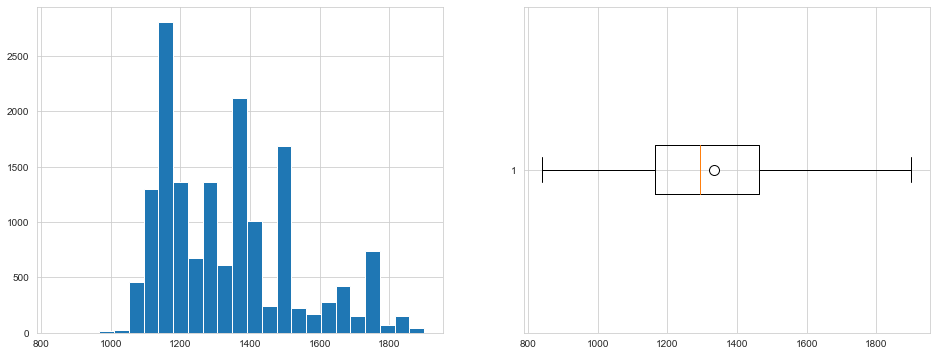

In [123]:
plt.figure(figsize=(16, 6))

plt.subplot(121)
plt.hist(df['Weight_kg'], bins=25)

plt.subplot(122)
plt.boxplot(df['Weight_kg'],
            vert=False,
            whis=2.5,
            showmeans=True,
            meanprops={
                "marker": "o",
                "markerfacecolor": "white",
                "markeredgecolor": "black",
                "markersize": "10"
            })

plt.show()

## - cons_comb

In [124]:
df["cons_comb"].describe()

count   15915.000
mean        4.869
std         1.556
min         0.000
25%         4.100
50%         4.700
75%         5.400
max        55.000
Name: cons_comb, dtype: float64

In [125]:
np.sort(df["cons_comb"].unique())

array([ 0. ,  1. ,  1.2,  1.6,  3. ,  3.1,  3.2,  3.3,  3.4,  3.5,  3.6,
        3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,  4.5,  4.6,  4.7,
        4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,  5.6,  5.7,  5.8,
        5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,  6.7,  6.8,  6.9,
        7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.8,  7.9,  8. ,  8.1,
        8.3,  8.6,  8.7,  9.1, 10. , 11. , 13.8, 32. , 33. , 38. , 40. ,
       43. , 46. , 50. , 51. , 54. , 55. ])

In [126]:
df["cons_comb"].value_counts(dropna=False)

4.000     967
5.400     942
4.700     821
4.400     774
3.900     770
         ... 
33.000      1
50.000      1
1.000       1
46.000      1
11.000      1
Name: cons_comb, Length: 72, dtype: int64

In [127]:
df[(df["cons_comb"] < 3.0) | (13.8 < df["cons_comb"])]

,make_model,body_type,price,km,kW,Type,Previous Owners,Nr. of Doors,Nr. of Seats,Gearing Type,Drive chain,Fuel,CO2 Emission,comfort_convenience,entertainment_media,Extras,safety_security,Gears,Inspection_new,age,Upholstery_type,Displacement_cc,Weight_kg,cons_comb
500,Audi A1,Sedans,13719,31255.000,70.000,Used,1.000,5.000,5.000,Manual,front,Benzine,98.000,"Air conditioning,Armrest,Electrical side mirro...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",5.000,Yes,3.000,Cloth,999.000,1135.000,43.000
2194,Audi A1,Sedans,21390,1519.261,70.000,New,0.000,5.000,5.000,Manual,front,Benzine,116.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Central door lock with r...",5.000,No,0.000,Cloth,999.000,1140.000,51.000
2196,Audi A1,Sedans,21390,1.000,70.000,New,0.000,5.000,5.000,Manual,front,Benzine,116.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Central door lock with r...",5.000,No,0.000,Cloth,999.000,1140.000,51.000
2210,Audi A1,Sedans,21280,1.000,70.000,New,0.000,5.000,5.000,Manual,front,Benzine,116.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Central door lock with r...",5.000,No,0.000,Cloth,999.000,1140.000,51.000
2237,Audi A1,Sedans,20980,1519.261,70.000,New,0.000,5.000,5.000,Manual,front,Benzine,116.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Central door lock with r...",5.000,No,0.000,Cloth,999.000,1140.000,51.000
3612,Audi A3,Sedans,38450,13800.000,110.000,Used,1.000,5.000,5.000,Semi-automatic,front,Electric,103.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Sport package,Sport seats,Voice C...","ABS,Adaptive Cruise Control,Alarm system,Centr...",6.000,No,1.000,Cloth,1395.000,1615.000,1.600
3615,Audi A3,Sedans,35899,20880.000,110.000,Used,1.000,5.000,5.000,Semi-automatic,front,Electric,103.000,"Air conditioning,Power windows,Seat ventilatio...","Bluetooth,Radio",Alloy wheels,"ABS,Adaptive Cruise Control,Alarm system,Centr...",6.000,No,1.000,Cloth,1395.000,1615.000,1.600
3617,Audi A3,Sedans,38000,12000.000,110.000,Used,1.000,5.000,5.000,Semi-automatic,front,Electric,103.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Shift paddles,Sport package,Sport...","ABS,Adaptive Cruise Control,Adaptive headlight...",6.000,No,1.000,Part leather,1395.000,1615.000,1.600
4089,Audi A3,Sedans,19500,23644.000,85.000,Used,1.000,5.000,5.000,Manual,front,Diesel,103.000,"Air conditioning,Automatic climate control,Cru...","Bluetooth,On-board computer",Alloy wheels,"ABS,Central door lock,Power steering,Traction ...",6.000,No,1.000,Cloth,1598.000,1360.000,40.000
4102,Audi A3,Sedans,19500,23644.000,85.000,Used,1.000,5.000,5.000,Manual,front,Diesel,106.000,"Air conditioning,Multi-function steering wheel...","Bluetooth,Radio","Alloy wheels,Sport seats","ABS,Central door lock,Driver-side airbag,Elect...",6.000,No,1.000,Cloth,1598.000,1260.000,40.000


In [128]:
df.loc[(df["cons_comb"] < 3.0) | (13.8 < df["cons_comb"]), "cons_comb"] = np.nan

In [129]:
df["cons_comb"].isnull().sum()

22

In [130]:
for group1 in list(df["make_model"].unique()):
    for group2 in list(df["body_type"].unique()):
        for group3 in list(df["Displacement_cc"].unique()):
            cond1 = df["make_model"] == group1
            cond2 = (df["make_model"] == group1) & (df["body_type"] == group2)
            cond3 = (df["make_model"] == group1) & (
                df["body_type"] == group2) & (df["Displacement_cc"] == group3)
            mode1 = list(df[cond1]["cons_comb"].mode())
            mode2 = list(df[cond2]["cons_comb"].mode())
            mode3 = list(df[cond3]["cons_comb"].mode())
            if mode3 != []:
                df.loc[cond3, "cons_comb"] = df.loc[cond3, "cons_comb"].fillna(
                    df[cond3]["cons_comb"].mode()[0])
            elif mode2 != []:
                df.loc[cond3, "cons_comb"] = df.loc[cond3, "cons_comb"].fillna(
                    df[cond2]["cons_comb"].mode()[0])
            elif mode1 != []:
                df.loc[cond3, "cons_comb"] = df.loc[cond3, "cons_comb"].fillna(
                    df[cond1]["cons_comb"].mode()[0])
            else:
                df.loc[cond3, "cons_comb"] = df.loc[cond3, "cons_comb"].fillna(
                    df["cons_comb"].mode()[0])

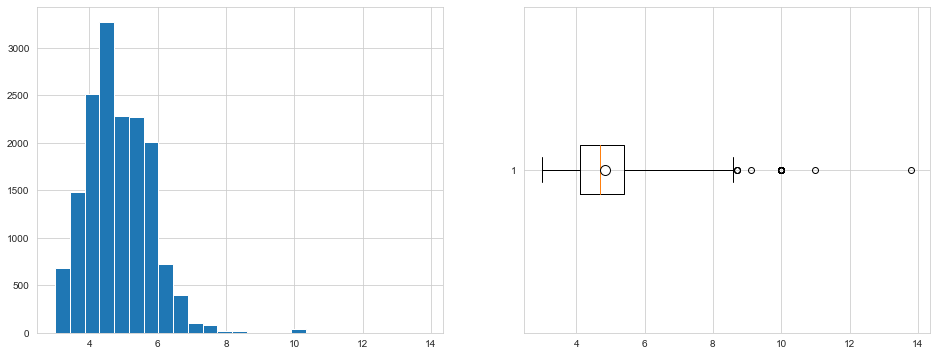

In [131]:
plt.figure(figsize=(16, 6))

plt.subplot(121)
plt.hist(df.cons_comb, bins=25)

plt.subplot(122)
plt.boxplot(df.cons_comb,
            vert=False,
            whis=2.5,
            showmeans=True,
            meanprops={
                "marker": "o",
                "markerfacecolor": "white",
                "markeredgecolor": "black",
                "markersize": "10"
            })

plt.show()

# Categorical Columns

## - make_model

In [132]:
df["make_model"].describe()

count       15915
unique          9
top       Audi A3
freq         3097
Name: make_model, dtype: object

In [133]:
df["make_model"].value_counts(dropna=False)

Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2525
Opel Corsa        2216
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64

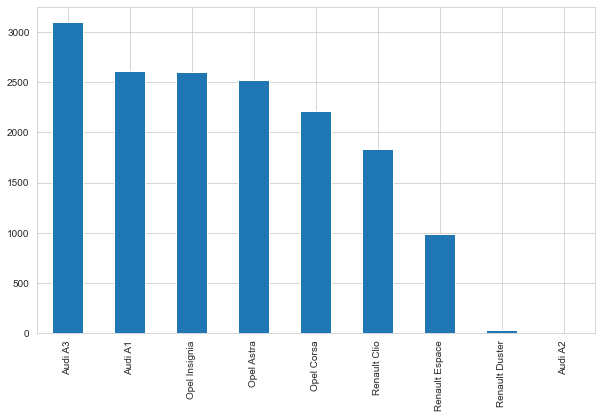

In [134]:
df['make_model'].value_counts().plot(kind='bar');

In [135]:
df[df['make_model'] == "Audi A2"]

,make_model,body_type,price,km,kW,Type,Previous Owners,Nr. of Doors,Nr. of Seats,Gearing Type,Drive chain,Fuel,CO2 Emission,comfort_convenience,entertainment_media,Extras,safety_security,Gears,Inspection_new,age,Upholstery_type,Displacement_cc,Weight_kg,cons_comb
2614,Audi A2,Off-Road,28200,26166.000,85.000,Employee's car,1.000,5.000,5.000,Manual,front,Diesel,109.138,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Alloy wheels,"ABS,Adaptive Cruise Control,Central door lock,...",6.000,No,1.000,Cloth,1598.000,1135.000,4.900


In [136]:
df[df["body_type"] == "Off-Road"]

,make_model,body_type,price,km,kW,Type,Previous Owners,Nr. of Doors,Nr. of Seats,Gearing Type,Drive chain,Fuel,CO2 Emission,comfort_convenience,entertainment_media,Extras,safety_security,Gears,Inspection_new,age,Upholstery_type,Displacement_cc,Weight_kg,cons_comb
2614,Audi A2,Off-Road,28200,26166.000,85.000,Employee's car,1.000,5.000,5.000,Manual,front,Diesel,109.138,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Alloy wheels,"ABS,Adaptive Cruise Control,Central door lock,...",6.000,No,1.000,Cloth,1598.000,1135.000,4.900
7105,Opel Astra,Off-Road,18590,12607.000,110.000,Used,1.000,5.000,5.000,Automatic,front,Benzine,128.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,MP3,On-board co...","Alloy wheels,Roof rack,Sport seats,Touch scree...","ABS,Adaptive headlights,Central door lock,Dayt...",6.000,No,1.000,Part leather,1399.000,1340.000,5.600
8950,Opel Corsa,Off-Road,7900,35410.000,66.000,Used,1.000,5.000,5.000,Manual,4WD,Benzine,120.000,"Air conditioning,Cruise control,Light sensor,P...",Bluetooth,Alloy wheels,"ABS,Adaptive headlights,Central door lock,Driv...",5.000,No,2.000,Cloth,1400.000,1163.000,5.200
8952,Opel Corsa,Off-Road,7900,37634.000,66.000,Used,1.000,5.000,5.000,Manual,4WD,Benzine,120.000,"Air conditioning,Cruise control,Light sensor,P...",Bluetooth,Alloy wheels,"ABS,Adaptive headlights,Central door lock,Driv...",5.000,No,2.000,Cloth,1400.000,1163.000,5.200
9144,Opel Corsa,Off-Road,8700,79143.000,74.000,Used,1.000,5.000,5.000,Manual,4WD,Benzine,119.000,"Air conditioning,Cruise control,Light sensor,P...",Bluetooth,Alloy wheels,"ABS,Adaptive headlights,Central door lock,Driv...",6.000,No,2.000,Cloth,1400.000,1237.000,5.100
10814,Opel Insignia,Off-Road,12750,159000.000,125.000,Used,1.000,5.000,5.000,Automatic,4WD,Diesel,169.000,"Air conditioning,Air suspension,Armrest,Automa...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Roof rack,Ski bag,Sport package,S...","ABS,Adaptive Cruise Control,Adaptive headlight...",8.000,No,3.000,Full leather,1956.000,1613.000,6.400
12541,Opel Insignia,Off-Road,34776,2190.536,155.000,New,1.000,5.000,5.000,Automatic,4WD,Diesel,134.000,"Air conditioning,Air suspension,Armrest,Automa...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Roof rack,Ski bag,Sport package,S...","ABS,Adaptive Cruise Control,Adaptive headlight...",8.000,No,0.000,Cloth,1956.000,1487.000,6.000
12625,Opel Insignia,Off-Road,32345,1519.261,147.000,New,1.000,5.000,5.000,Automatic,4WD,Benzine,138.000,"Air conditioning,Air suspension,Armrest,Automa...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Roof rack,Ski bag,Sport package,S...","ABS,Adaptive Cruise Control,Adaptive headlight...",6.000,No,0.000,Cloth,1598.000,1487.000,6.000
12643,Opel Insignia,Off-Road,31505,2190.536,125.000,New,1.000,5.000,5.000,Automatic,front,Diesel,134.000,"Air conditioning,Air suspension,Armrest,Automa...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Roof rack,Ski bag,Sport package,S...","ABS,Adaptive Cruise Control,Adaptive headlight...",8.000,No,0.000,Cloth,1956.000,1487.000,6.000
12805,Opel Insignia,Off-Road,33490,8.000,122.000,New,1.000,5.000,5.000,Manual,4WD,Benzine,131.000,"Cruise control,Electrical side mirrors,Navigat...","Bluetooth,Hands-free equipment,On-board computer","Alloy wheels,Roof rack,Sport seats","ABS,Central door lock,Daytime running lights,D...",6.000,No,0.000,Cloth,1490.000,1487.000,5.700


In [137]:
df.shape

(15915, 24)

In [138]:
df.drop(df[df['make_model'] == "Audi A2"].index, axis=0, inplace=True)

In [139]:
df.reset_index(drop = True, inplace = True)

In [140]:
df.shape

(15914, 24)

## - body_type

In [141]:
df["body_type"].describe()

count      15914
unique         8
top       Sedans
freq        8014
Name: body_type, dtype: object

In [142]:
df["body_type"].value_counts(dropna=False)

Sedans           8014
Station wagon    3667
Compact          3240
Van               817
Transporter        88
Off-Road           55
Coupe              25
Convertible         8
Name: body_type, dtype: int64

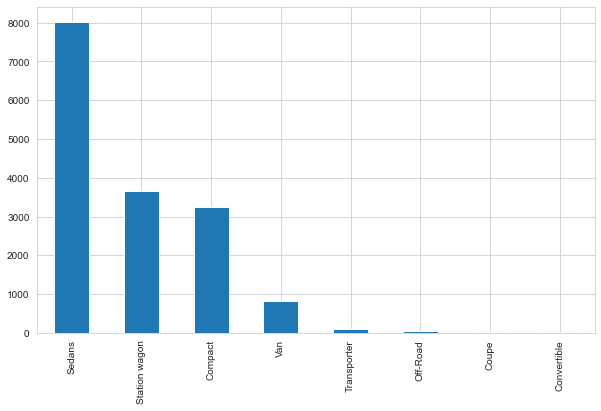

In [143]:
df['body_type'].value_counts().plot(kind='bar');

In [144]:
df[df['body_type'] == "Convertible"]

,make_model,body_type,price,km,kW,Type,Previous Owners,Nr. of Doors,Nr. of Seats,Gearing Type,Drive chain,Fuel,CO2 Emission,comfort_convenience,entertainment_media,Extras,safety_security,Gears,Inspection_new,age,Upholstery_type,Displacement_cc,Weight_kg,cons_comb
2614,Audi A3,Convertible,10893,19800.000,110.000,Used,1.000,2.000,4.000,Automatic,front,Benzine,116.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Shift paddles","ABS,Adaptive Cruise Control,Blind spot monitor...",7.000,No,1.000,Part leather,1498.000,1470.000,5.100
3305,Audi A3,Convertible,20000,37000.000,110.000,Used,1.000,2.000,4.000,Semi-automatic,front,Diesel,124.000,"Air conditioning,Seat ventilation,Split rear s...","Bluetooth,Radio",Alloy wheels,"ABS,Adaptive Cruise Control,Alarm system,Centr...",6.000,No,3.000,Part leather,1968.000,1555.000,4.700
3596,Audi A3,Convertible,56100,8364.000,228.000,Used,1.000,2.000,5.000,Semi-automatic,4WD,Benzine,153.000,"Air conditioning,Armrest,Automatic climate con...","CD player,On-board computer,Radio","Alloy wheels,Shift paddles,Sport seats,Sport s...","ABS,Alarm system,Central door lock,Driver-side...",7.000,No,1.000,Part leather,1984.000,1635.000,7.100
3636,Audi A3,Convertible,29500,26000.000,110.000,Used,1.000,2.000,4.000,Semi-automatic,front,Diesel,117.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport package,Sport seats,Voice C...","Adaptive Cruise Control,Blind spot monitor,Cen...",7.000,No,2.000,Part leather,1968.000,1575.000,4.500
3655,Audi A3,Convertible,32950,8831.000,110.000,Used,1.000,2.000,4.000,Semi-automatic,front,Benzine,117.000,"Air conditioning,Armrest,Automatic climate con...","CD player,MP3,Radio","Alloy wheels,Sport seats,Sport suspension","ABS,Central door lock,Driver-side airbag,Elect...",7.000,No,2.000,Part leather,1395.000,1355.000,4.900
3660,Audi A3,Convertible,30900,468.000,110.000,Employee's car,1.000,2.000,4.000,Semi-automatic,front,Diesel,124.000,"Air conditioning,Cruise control,Navigation sys...","Bluetooth,CD player,Hands-free equipment,MP3,R...","Alloy wheels,Sport seats,Sport suspension","ABS,Central door lock,Isofix,Power steering,Tr...",6.000,No,2.000,Cloth,1968.000,1355.000,4.700
3723,Audi A3,Convertible,22000,9000.000,135.000,Used,1.000,2.000,4.000,Automatic,front,Diesel,134.000,"Air conditioning,Electrical side mirrors,Hill ...","Bluetooth,CD player,MP3,On-board computer,Radio","Alloy wheels,Voice Control","ABS,Central door lock with remote control,Driv...",7.000,No,1.000,Part leather,1968.000,1685.000,5.100
3891,Audi A3,Convertible,20900,54800.000,81.000,Used,1.000,5.000,5.000,Automatic,front,Diesel,99.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Catalytic Converter,Shift paddles","ABS,Central door lock,Central door lock with r...",7.000,No,2.000,Cloth,1598.000,1360.000,3.800


## - Type

In [145]:
df["Type"].describe()

count     15914
unique        5
top        Used
freq      11095
Name: Type, dtype: object

In [146]:
df["Type"].value_counts(dropna=False)

Used              11095
New                1649
Pre-registered     1364
Employee's car     1010
Demonstration       796
Name: Type, dtype: int64

In [148]:
df.groupby(["Type", "age"]).km.describe()

count      mean       std       min       25%  \
Type           age                                                      
Demonstration  0.000  635.000  3259.495  3446.856     3.000   500.000   
               1.000  132.000  8336.712  7945.153     8.000  1603.000   
               2.000   27.000 25327.296 17914.687    20.000 15470.500   
               3.000    2.000 45500.000 14849.242 35000.000 40250.000   
Employee's car 0.000  130.000  4311.509  5322.320     1.000   355.000   
               1.000  764.000 19327.481  9357.555     1.000 11300.000   
               2.000   99.000 37926.505 21932.485    59.000 22138.000   
               3.000   17.000 59123.647 28115.753  7790.000 40700.000   
New            0.000 1646.000   869.689   858.922     0.000    10.000   
               1.000    3.000  6761.793 11619.197     7.000    53.500   
Pre-registered 0.000 1193.000   226.210   775.604     1.000    10.000   
               1.000  161.000  3541.229  7189.056     1.000    10.000   
               2.000    9.000  1854.000  4129.197     1.000     1.000   
               3.000    1.000    10.000       NaN    10.000    10.000   
Used           0.000  829.000  3621.306  8384.659     1.000    31.000   
               1.000 3465.000 18823.249 10928.705     1.000 10824.000   
               2.000 3142.000 42126.604 28436.984    15.000 21900.750   
               3.000 3659.000 77573.837 39158.993    35.000 48157.500   

                           50%       75%        max  
Type           age                                   
Demonstration  0.000  2500.000  4999.000  20000.000  
               1.000  5247.000 13612.500  38400.000  
               2.000 18900.000 28238.000  78000.000  
               3.000 45500.000 50750.000  56000.000  
Employee's car 0.000  3250.000  6003.000  37500.000  
               1.000 21000.000 26965.000  80009.000  
               2.000 37750.000 46500.000 112789.000  
               3.000 58962.000 84386.000 103000.000  
New            0.000  1519.261  1519.261   2500.000  
               1.000   100.000 10139.189  20178.379  
Pre-registered 0.000    10.000    50.000   9998.000  
               1.000    43.000   300.000  20178.379  
               2.000    99.000   153.000  12300.000  
               3.000    10.000    10.000     10.000  
Used           0.000  1013.000  5000.000 127022.000  
               1.000 18100.000 25078.000 136000.000  
               2.000 35000.000 55000.000 317000.000  
               3.000 73000.000 99965.000 291800.000

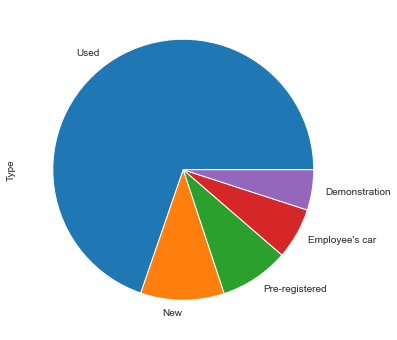

In [149]:
df['Type'].value_counts().plot(kind='pie');

## - Gearing Type

In [150]:
df["Gearing Type"].describe()

count      15914
unique         3
top       Manual
freq        8148
Name: Gearing Type, dtype: object

In [151]:
df["Gearing Type"].value_counts(dropna=False)

Manual            8148
Automatic         7297
Semi-automatic     469
Name: Gearing Type, dtype: int64

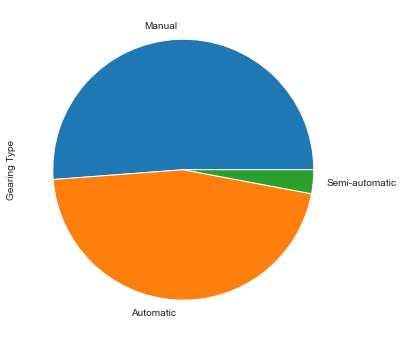

In [152]:
df['Gearing Type'].value_counts().plot(kind='pie');

## - Drive chain

In [153]:
df["Drive chain"].describe()

count     15914
unique        3
top       front
freq      15703
Name: Drive chain, dtype: object

In [154]:
df["Drive chain"].value_counts(dropna=False)

front    15703
4WD        207
rear         4
Name: Drive chain, dtype: int64

In [155]:
df[df["Drive chain"] == "rear"]

,make_model,body_type,price,km,kW,Type,Previous Owners,Nr. of Doors,Nr. of Seats,Gearing Type,Drive chain,Fuel,CO2 Emission,comfort_convenience,entertainment_media,Extras,safety_security,Gears,Inspection_new,age,Upholstery_type,Displacement_cc,Weight_kg,cons_comb
11026,Opel Insignia,Station wagon,12900,76000.000,100.000,Used,1.000,5.000,5.000,Manual,rear,Diesel,109.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Touch screen,Voice Control","ABS,Central door lock,Central door lock with r...",6.000,No,3.000,Cloth,1598.000,1664.000,4.100
11451,Opel Insignia,Sedans,18990,17887.000,125.000,Used,1.000,5.000,5.000,Automatic,rear,Benzine,159.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,On-bo...","Alloy wheels,Sport package,Touch screen,Voice ...","Adaptive headlights,Central door lock,Daytime ...",6.000,No,2.000,Full leather,1598.000,1613.000,6.700
12084,Opel Insignia,Station wagon,18950,24987.000,125.000,Used,1.000,5.000,5.000,Manual,rear,Diesel,134.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,MP3,On-board co...","Alloy wheels,Sport seats","ABS,Central door lock,Daytime running lights,D...",6.000,Yes,1.000,Cloth,1956.000,1487.000,5.800
14606,Renault Clio,Sedans,10490,27700.000,55.000,Used,1.000,5.000,5.000,Manual,rear,Diesel,104.000,"Air conditioning,Cruise control,Navigation sys...","Bluetooth,CD player,Hands-free equipment,Radio...",Touch screen,"ABS,Central door lock,Central door lock with r...",5.000,No,1.000,Cloth,1461.000,1162.000,4.000


## - Fuel

In [156]:
df["Fuel"].describe()

count       15914
unique          4
top       Benzine
freq         8548
Name: Fuel, dtype: object

In [157]:
df["Fuel"].value_counts(dropna=False)

Benzine     8548
Diesel      7297
LPG/CNG       64
Electric       5
Name: Fuel, dtype: int64

In [158]:
df[df["Fuel"] == "Electric"]

,make_model,body_type,price,km,kW,Type,Previous Owners,Nr. of Doors,Nr. of Seats,Gearing Type,Drive chain,Fuel,CO2 Emission,comfort_convenience,entertainment_media,Extras,safety_security,Gears,Inspection_new,age,Upholstery_type,Displacement_cc,Weight_kg,cons_comb
3355,Audi A3,Compact,24950,57000.000,150.000,Used,1.000,5.000,5.000,Semi-automatic,front,Electric,105.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Roof rack,Sport package,Sport sea...","ABS,Adaptive Cruise Control,Adaptive headlight...",6.000,No,3.000,Part leather,1400.000,1280.000,4.000
3611,Audi A3,Sedans,38450,13800.000,110.000,Used,1.000,5.000,5.000,Semi-automatic,front,Electric,103.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Sport package,Sport seats,Voice C...","ABS,Adaptive Cruise Control,Alarm system,Centr...",6.000,No,1.000,Cloth,1395.000,1615.000,3.400
3614,Audi A3,Sedans,35899,20880.000,110.000,Used,1.000,5.000,5.000,Semi-automatic,front,Electric,103.000,"Air conditioning,Power windows,Seat ventilatio...","Bluetooth,Radio",Alloy wheels,"ABS,Adaptive Cruise Control,Alarm system,Centr...",6.000,No,1.000,Cloth,1395.000,1615.000,3.400
3616,Audi A3,Sedans,38000,12000.000,110.000,Used,1.000,5.000,5.000,Semi-automatic,front,Electric,103.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Shift paddles,Sport package,Sport...","ABS,Adaptive Cruise Control,Adaptive headlight...",6.000,No,1.000,Part leather,1395.000,1615.000,3.400
13392,Renault Clio,Sedans,8490,23863.000,55.000,Used,1.000,5.000,5.000,Automatic,front,Electric,114.000,"Air conditioning,Cruise control,Navigation system",On-board computer,Alloy wheels,Driver-side airbag,6.000,No,3.000,Cloth,1461.000,1165.000,3.300


In [159]:
df[(df["Fuel"] == "Electric") & (df["make_model"] == "Renault Clio")]

,make_model,body_type,price,km,kW,Type,Previous Owners,Nr. of Doors,Nr. of Seats,Gearing Type,Drive chain,Fuel,CO2 Emission,comfort_convenience,entertainment_media,Extras,safety_security,Gears,Inspection_new,age,Upholstery_type,Displacement_cc,Weight_kg,cons_comb
13392,Renault Clio,Sedans,8490,23863.000,55.000,Used,1.000,5.000,5.000,Automatic,front,Electric,114.000,"Air conditioning,Cruise control,Navigation system",On-board computer,Alloy wheels,Driver-side airbag,6.000,No,3.000,Cloth,1461.000,1165.000,3.300


In [160]:
df.shape

(15914, 24)

In [162]:
df.drop(df[(df["Fuel"] == "Electric") & (df["make_model"] == "Renault Clio")].index, axis=0, inplace=True)

In [163]:
df.reset_index(drop = True, inplace = True)

In [164]:
df.shape

(15913, 24)

## - comfort_convenience

In [165]:
df["comfort_convenience"].describe()

count                                                 15913
unique                                                 6196
top       Air conditioning,Electrical side mirrors,Hill ...
freq                                                    388
Name: comfort_convenience, dtype: object

In [166]:
df["comfort_convenience"]

0        Air conditioning,Armrest,Automatic climate con...
1        Air conditioning,Automatic climate control,Hil...
2        Air conditioning,Cruise control,Electrical sid...
3        Air suspension,Armrest,Auxiliary heating,Elect...
4        Air conditioning,Armrest,Automatic climate con...
                               ...                        
15908    Air conditioning,Automatic climate control,Cru...
15909    Air conditioning,Automatic climate control,Cru...
15910    Air conditioning,Armrest,Automatic climate con...
15911    Air conditioning,Automatic climate control,Cru...
15912    Air conditioning,Automatic climate control,Cru...
Name: comfort_convenience, Length: 15913, dtype: object

## - entertainment_media

In [167]:
df["entertainment_media"].describe()

count                                                 15913
unique                                                  346
top       Bluetooth,Hands-free equipment,On-board comput...
freq                                                   1741
Name: entertainment_media, dtype: object

In [168]:
df["entertainment_media"]

0        Bluetooth,Hands-free equipment,On-board comput...
1        Bluetooth,Hands-free equipment,On-board comput...
2                                    MP3,On-board computer
3        Bluetooth,CD player,Hands-free equipment,MP3,O...
4        Bluetooth,CD player,Hands-free equipment,MP3,O...
                               ...                        
15908    Bluetooth,Digital radio,Hands-free equipment,O...
15909    Bluetooth,Digital radio,Hands-free equipment,R...
15910    Bluetooth,Hands-free equipment,On-board comput...
15911                    Bluetooth,Digital radio,Radio,USB
15912                                                  USB
Name: entertainment_media, Length: 15913, dtype: object

## - Extras

In [169]:
df["Extras"].describe()

count            15913
unique             659
top       Alloy wheels
freq              5789
Name: Extras, dtype: object

In [170]:
df["Extras"]

0           Alloy wheels,Catalytic Converter,Voice Control
1        Alloy wheels,Sport seats,Sport suspension,Voic...
2                               Alloy wheels,Voice Control
3                   Alloy wheels,Sport seats,Voice Control
4        Alloy wheels,Sport package,Sport suspension,Vo...
                               ...                        
15908                            Alloy wheels,Touch screen
15909              Alloy wheels,Touch screen,Voice Control
15910                                         Alloy wheels
15911                            Alloy wheels,Touch screen
15912                            Alloy wheels,Touch screen
Name: Extras, Length: 15913, dtype: object

## - safety_security

In [171]:
df["safety_security"].describe()

count                                                 15913
unique                                                 4442
top       ABS,Central door lock,Daytime running lights,D...
freq                                                    712
Name: safety_security, dtype: object

In [172]:
df["safety_security"]

0        ABS,Central door lock,Daytime running lights,D...
1        ABS,Central door lock,Central door lock with r...
2        ABS,Central door lock,Daytime running lights,D...
3        ABS,Alarm system,Central door lock with remote...
4        ABS,Central door lock,Driver-side airbag,Elect...
                               ...                        
15908    ABS,Central door lock,Central door lock with r...
15909    ABS,Adaptive Cruise Control,Blind spot monitor...
15910    ABS,Adaptive Cruise Control,Blind spot monitor...
15911    ABS,Blind spot monitor,Driver-side airbag,Elec...
15912    ABS,Blind spot monitor,Daytime running lights,...
Name: safety_security, Length: 15913, dtype: object

## - Inspection_new

In [173]:
df["Inspection_new"].describe()

count     15913
unique        2
top          No
freq      11981
Name: Inspection_new, dtype: object

In [174]:
df["Inspection_new"].value_counts(dropna=False)

No     11981
Yes     3932
Name: Inspection_new, dtype: int64

## - Upholstery_type

In [175]:
df["Upholstery_type"].describe()

count     15913
unique        5
top       Cloth
freq      12881
Name: Upholstery_type, dtype: object

In [176]:
df["Upholstery_type"].value_counts(dropna=False)

Cloth           12881
Part leather     1508
Full leather     1407
Velour             60
alcantara          57
Name: Upholstery_type, dtype: int64

# Final Step (Checking final situation of data via graphs)

In [177]:
df.shape

(15913, 24)

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15913 entries, 0 to 15912
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15913 non-null  object 
 1   body_type            15913 non-null  object 
 2   price                15913 non-null  int64  
 3   km                   15913 non-null  float64
 4   kW                   15913 non-null  float64
 5   Type                 15913 non-null  object 
 6   Previous Owners      15913 non-null  float64
 7   Nr. of Doors         15913 non-null  float64
 8   Nr. of Seats         15913 non-null  float64
 9   Gearing Type         15913 non-null  object 
 10  Drive chain          15913 non-null  object 
 11  Fuel                 15913 non-null  object 
 12  CO2 Emission         15913 non-null  float64
 13  comfort_convenience  15913 non-null  object 
 14  entertainment_media  15913 non-null  object 
 15  Extras               15913 non-null 

In [179]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,15913.000,18024.340,7381.315,4950.000,12850.000,16900.000,21900.000,74600.000
km,15913.000,32096.103,36977.250,0.000,2190.536,20410.000,46928.000,317000.000
kW,15913.000,88.500,26.679,40.000,66.000,85.000,103.000,294.000
Previous Owners,15913.000,1.042,0.340,0.000,1.000,1.000,1.000,4.000
Nr. of Doors,15913.000,4.661,0.641,2.000,4.000,5.000,5.000,5.000
Nr. of Seats,15913.000,4.952,0.476,2.000,5.000,5.000,5.000,7.000
CO2 Emission,15913.000,117.571,17.978,80.000,104.000,117.000,128.000,253.000
Gears,15913.000,5.937,0.705,5.000,5.000,6.000,6.000,8.000
age,15913.000,1.390,1.121,0.000,0.000,1.000,2.000,3.000
Displacement_cc,15913.000,1428.381,276.819,890.000,1229.000,1461.000,1598.000,2480.000


In [180]:
df.describe(include="O").T

,count,unique,top,freq
make_model,15913,8,Audi A3,3097
body_type,15913,8,Sedans,8013
Type,15913,5,Used,11094
Gearing Type,15913,3,Manual,8148
Drive chain,15913,3,front,15702
Fuel,15913,4,Benzine,8548
comfort_convenience,15913,6196,"Air conditioning,Electrical side mirrors,Hill ...",388
entertainment_media,15913,346,"Bluetooth,Hands-free equipment,On-board comput...",1741
Extras,15913,659,Alloy wheels,5789
safety_security,15913,4442,"ABS,Central door lock,Daytime running lights,D...",712


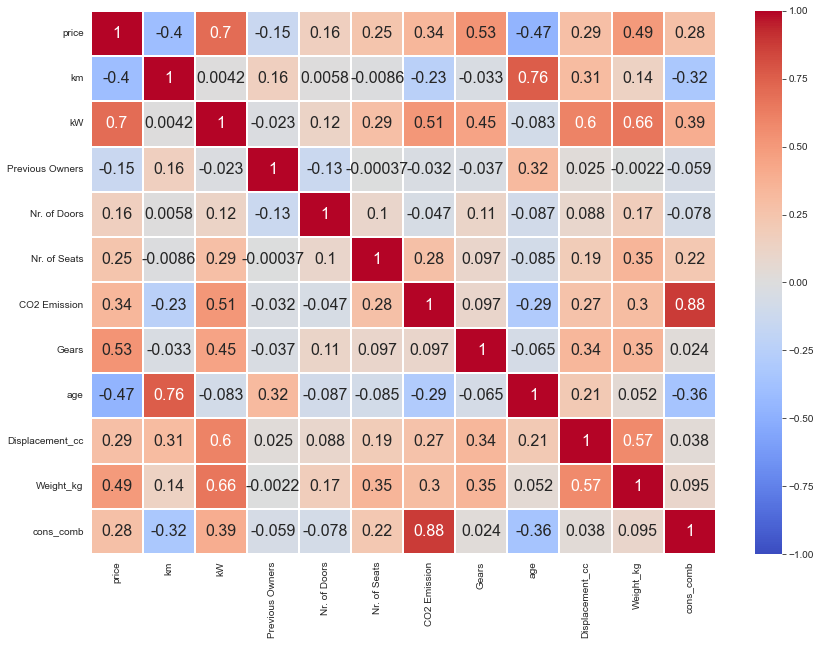

In [181]:
plt.figure(figsize=(14, 10))

sns.heatmap(df.corr(),
            annot=True,
            center=0,
            vmin=-1,
            cmap="coolwarm",
            linewidths=0.2,
            annot_kws={"size": 12});

We will delete these columns after we determined that the following columns did not have enough effect on the price according to the heatmap chart.

In [182]:
df.drop(columns=["Previous Owners", "Nr. of Doors", "Nr. of Seats"], axis = 0, inplace = True)

In [183]:
# Correlated columns with "price"
"km", "kW", "Gears", "age", "Weight_kg"

('km', 'kW', 'Gears', 'age', 'Weight_kg')

In [184]:
df.head(3).T

,0,1,2
make_model,Audi A1,Audi A1,Audi A1
body_type,Sedans,Sedans,Sedans
price,15770,14500,14640
km,56013.000,80000.000,83450.000
kW,66.000,141.000,85.000
Type,Used,Used,Used
Gearing Type,Automatic,Automatic,Automatic
Drive chain,front,front,front
Fuel,Diesel,Benzine,Diesel
CO2 Emission,99.000,129.000,99.000


In [185]:
df.tail(3).T

,15910,15911,15912
make_model,Renault Espace,Renault Espace,Renault Espace
body_type,Van,Van,Van
price,39875,39700,40999
km,15.000,10.000,1519.261
kW,146.000,147.000,165.000
Type,Pre-registered,Pre-registered,Demonstration
Gearing Type,Automatic,Automatic,Automatic
Drive chain,front,front,4WD
Fuel,Diesel,Diesel,Benzine
CO2 Emission,139.000,139.000,153.000


In [186]:
df.groupby(["Gears", "age"]).price.describe()

count      mean      std       min       25%       50%  \
Gears age                                                               
5.000 0.000 1104.000 14138.841 4467.903  6900.000 10880.000 11299.000   
      1.000 1179.000 12717.222 3268.899  7499.000  9880.000 10798.000   
      2.000  925.000 10996.879 3095.538  6000.000  8500.000  9490.000   
      3.000 1049.000  9842.398 2825.451  4950.000  7599.000  8470.000   
6.000 0.000 2311.000 24905.508 8230.427  6950.000 18249.000 23600.000   
      1.000 2501.000 19598.724 5129.398  5555.000 15485.000 19400.000   
      2.000 1835.000 16432.561 4505.912  7800.000 12700.000 16290.000   
      3.000 1974.000 14496.996 4212.408  6000.000 11290.000 14225.000   
7.000 0.000  891.000 27347.866 5371.680 15500.000 24900.000 26500.000   
      1.000  782.000 23118.266 5747.585 10893.000 20757.500 22248.500   
      2.000  484.000 20827.771 4545.634 12500.000 18890.000 20490.000   
      3.000  653.000 17146.711 2622.697 10400.000 15700.000 16900.000   
8.000 0.000  127.000 35291.488 4045.266 14770.000 33536.500 36170.000   
      1.000   63.000 23334.651 1011.485 19480.000 22890.000 23490.000   
      2.000   33.000 20353.515  969.100 16880.000 20500.000 20500.000   
      3.000    2.000 15575.000 3995.153 12750.000 14162.500 15575.000   

                  75%       max  
Gears age                        
5.000 0.000 17990.000 27980.000  
      1.000 15990.000 27850.000  
      2.000 14500.000 19950.000  
      3.000 12920.000 18497.000  
6.000 0.000 29900.000 64332.000  
      1.000 21500.000 39990.000  
      2.000 18874.500 35000.000  
      3.000 15950.000 35000.000  
7.000 0.000 27750.000 68320.000  
      1.000 23200.000 74600.000  
      2.000 21500.000 67600.000  
      3.000 17989.000 42500.000  
8.000 0.000 37782.500 40990.000  
      1.000 23987.000 24590.000  
      2.000 20980.000 21631.000  
      3.000 16987.500 18400.000

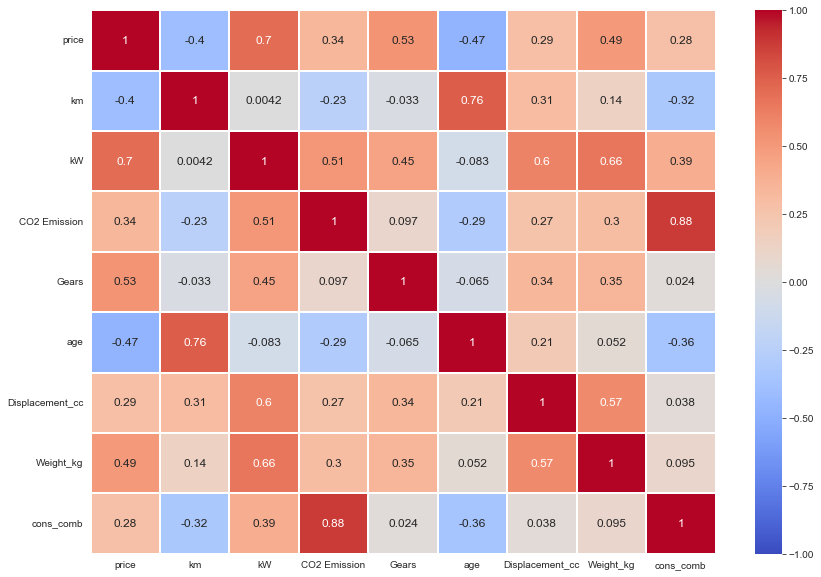

In [187]:
plt.figure(figsize=(14, 10))

sns.heatmap(df.corr(),
            annot=True,
            center=0,
            vmin=-1,
            cmap="coolwarm",
            linewidths=0.2,
            annot_kws={"size": 12});

## Export dataframe to csv file (without dummy)

In [188]:
df.to_csv('auto_scout_not_dummy.csv', index=False)

# Dummy Operation

In [189]:
df = df.join(df["comfort_convenience"].str.get_dummies(sep = ",").add_prefix("cc_"), lsuffix='_')
df = df.join(df["entertainment_media"].str.get_dummies(sep = ",").add_prefix("em_"), lsuffix='_')
df = df.join(df["Extras"].str.get_dummies(sep = ",").add_prefix("ex_"), lsuffix='_')
df = df.join(df["safety_security"].str.get_dummies(sep = ",").add_prefix("ss_"), lsuffix='_')

In [190]:
df.drop(["comfort_convenience","entertainment_media","Extras","safety_security"], axis=1, inplace=True)

In [191]:
df.shape

(15913, 111)

In [192]:
df_final = pd.get_dummies(df, drop_first=True)

In [193]:
df_final.shape

(15913, 133)

In [194]:
df_final.head()

,price,km,kW,CO2 Emission,Gears,age,Displacement_cc,Weight_kg,cons_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Gearing Type_Manual,Gearing Type_Semi-automatic,Drive chain_front,Drive chain_rear,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Inspection_new_Yes,Upholstery_type_Full leather,Upholstery_type_Part leather,Upholstery_type_Velour,Upholstery_type_alcantara
0,15770,56013.000,66.000,99.000,7.000,3.000,1422.000,1220.000,3.800,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0
1,14500,80000.000,141.000,129.000,7.000,2.000,1798.000,1255.000,5.600,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
2,14640,83450.000,85.000,99.000,7.000,3.000,1598.000,1135.000,3.800,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0
3,14500,73000.000,66.000,99.000,6.000,3.000,1422.000,1195.000,3.800,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,0,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0
4,16790,16200.000,66.000,109.000,7.000,3.000,1422.000,1135.000,4.100,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,

## Export dataframe to csv file (dummy)

In [195]:
df_final.to_csv("final_scout_dummy.csv", index=False)

------------------------------------
END OF THE PART - 3 : HANDLING WITH MISSING VALUES